<a href="https://colab.research.google.com/github/Quantum-Intelligence-Frontier/dldna/blob/main/notebooks/zh/part_1/02_深度学习的数学.ipynb" target="_parent">
<img src="https://colab.research.google.com/assets/colab-badge.svg" alt="在Colab中打开"/>
</a>

# 2. 深度学习的数学

> "所有的数都是由单位组成的，所有的数都可以被分解为单位" - 阿尔-花拉子米 (780-850)，波斯数学家

在本章中，我们将探讨构成深度学习核心的数学概念。深度学习模型是由复杂的数学函数组合而成的。深入理解线性代数、微积分、概率和统计对于掌握模型的工作原理、提高性能以及设计新模型至关重要。例如，对矩阵运算的理解对于理解卷积神经网络 (CNN) 的工作方式非常重要，而微分和优化在理解模型的学习过程中起着核心作用。

如果您觉得本章难以理解，可以跳到下一章。随时回过头来熟悉这些内容会更好。

## 2.1 线性代数基础

线性代数是深度学习的基础。从矩阵运算到高级优化技术，线性代数都是必不可少的工具。在这一节中，我们将从向量、矩阵、张量等基本概念开始，一直探讨到奇异值分解和主成分分析等高级主题。

### 2.1.1 向量
向量和矩阵是表示数据并转换每个数据的基本运算。

**向量的基础**

向量是一个具有大小和方向的数学对象。其数学定义是一致的。然而，根据应用领域的不同，看待它的角度会略有差异。

* 数学视角: 在数学中，向量被定义为一个具有大小和方向的抽象对象。作为向量空间中的元素，它具有关于加法和标量乘法封闭的特点。
* 物理学视角: 在物理学中，向量主要用于表示力、速度、加速度等物理量。在这种情况下，向量的大小和方向具有实际的物理意义。物理学处理所有的变化都使用向量，并且向量的维度是有限的。空间通常是三维的，时空则是四维的。
* 计算机科学视角: 在计算机科学中，尤其是在机器学习和深度学习领域，向量主要用于表示数据的特征(feature)。这里的每个元素代表了特定的数据属性，不一定具有物理上的方向性。为了表达特性，向量维度可以从几十到几千不等。

理解这些不同的观点对于在深度学习中处理向量非常重要。虽然在深度学习中向量主要从计算机科学的角度使用，但数学运算和物理直觉也是共同使用的。

在深度学习中，向量主要用于同时表示数据的多个特征(features)。例如，在一个用于预测房价的模型中，可以使用一个五维向量来表示如下内容。

$\mathbf{v} = \begin{bmatrix} v_1 \ v_2 \ v_3 \ v_4 \ v_5 \end{bmatrix}$

该向量中的每个元素代表了房子的不同特征。
$v_1$: 房屋面积 (平方米), $v_2$: 卧室数量, $v_3$: 房龄 (年), $v_4$: 距离最近学校的距离 (公里), $v_5$: 犯罪率 (百分比)

深度学习模型可以将这样的多维向量作为输入来预测房价。像这样，向量用于有效地表示和处理复杂的真实数据的多个特征。

在NumPy中，可以轻松地创建并使用向量。

In [ ]:
!pip install dldna[colab] # in Colab

# !pip install dldna[all] # in your local

In [1]:
import numpy as np

# Vector creation
v = np.array([1, 2, 3])

# Vector magnitude (L2 norm)
magnitude = np.linalg.norm(v)
print(f"Vector magnitude: {magnitude}")

# Vector normalization
normalized_v = v / magnitude
print(f"Normalized vector: {normalized_v}")

Vector magnitude: 3.7416573867739413
Normalized vector: [0.26726124 0.53452248 0.80178373]


向量的概念更深入地探讨时，涉及行向量和列向量的区别，以及物理学和工程学中使用的协变向量和逆变向量的概念。

**行向量与列向量**

向量通常以列向量为基本形式表示。行向量可以视为列向量的转置（transpose）。更精确地说，从数学角度来看，行向量也可以称为对偶向量或协变向量(covector)。

列向量: $\mathbf{v} = \begin{bmatrix} v_1 \ v_2 \ v_3 \end{bmatrix}$,  行向量: $\mathbf{v}^T = [v_1 \quad v_2 \quad v_3]$

行向量和列向量具有不同的性质。行向量作为线性函数作用于列向量，生成标量。这通过内积运算来表示。

$$\mathbf{u}^T\mathbf{v} = u_1v_1 + u_2v_2 + u_3v_3$$

**协变向量与逆变向量**

在物理学和工程学中，协变向量(covariant vector)和逆变向量(contravariant vector)的概念是非常重要的。这表示了向量在坐标系变换时的转换特性。

- 逆变向量: 当坐标系改变时，沿基向量相反方向变换的向量。通常用上标表示（例如：$v^i$）。
- 协变向量: 当坐标系改变时，沿基向量相同方向变换的向量。通常用下标表示（例如：$v_i$）。

在张量记法中，这种区别非常重要。例如，$T^i_j$中的上指标$i$表示逆变性，而下指标$j$表示协变性。特别是，在广义相对论中，这些协变性和逆变性的概念是非常重要的。

**深度学习中的应用**

在深度学习中，这样的协变性与逆变性的区别通常不会被明确强调。原因如下：

1. 标准化的数据表示：在深度学习中，大多数情况下，数据以标准化的形式（例如：列向量）处理，因此协变性和逆变性的区分变得不那么重要。
2. 欧几里得空间假设：许多深度学习模型假定数据位于欧几里得空间。在这种空间中，协变性与逆变性的区分并不明显。
3. 运算的简化：深度学习的主要运算（例如：矩阵乘法、激活函数应用）即使没有这些区分也可以有效地执行。
4. 自动微分：现代深度学习框架的自动微分功能可以在不考虑这些细微区别的前提下计算准确的梯度。

然而，在某些领域，特别是在基于物理的机器学习或几何深度学习中，这样的概念仍然非常重要。例如，在利用微分几何学的深度学习模型中，协变性和逆变性的区分可能在模型的设计和解释中发挥重要作用。

总之，在深度学习中，向量的基本概念被简化使用，但在更复杂的数学概念对于高级模型设计和特殊应用领域仍然是重要的。

::: {.callout-note collapse="true" title="点击查看内容（深入探讨：向量空间和线性组合）"}
### 向量空间与线性组合

向量空间（vector space）是线性代数的核心概念，为深度学习中数据的表示和转换提供了基本框架。在此次深入探讨中，我们将仔细研究向量空间的严格定义及其相关概念，并提供在深度学习中的应用示例。

#### 向量空间 (Vector Space)

向量空间是由满足以下8条公理（axiom）的集合$V$和加法（addition）及标量乘法（scalar multiplication）运算组成。其中，$V$的元素称为向量（vector），而标量（scalar）是实数集$\mathbb{R}$或复数集$\mathbb{C}$中的元素。（深度学习中主要使用实数）

**向量加法 (Vector Addition):** 对于$V$中的任意两个元素$\mathbf{u}, \mathbf{v}$，$\mathbf{u} + \mathbf{v}$也是$V$的元素。 （对加法封闭，closed under addition）

**标量乘法 (Scalar Multiplication):** 对于$V$中的任意元素$\mathbf{u}$和标量$c$，$c\mathbf{u}$也是$V$的元素。（对标量乘法封闭，closed under scalar multiplication）

**向量加法和标量乘法必须满足以下8条公理。**  ($\mathbf{u}, \mathbf{v}, \mathbf{w} \in V$, $c, d$: 标量)

1. **加法的交换律 (Commutativity of addition):** $\mathbf{u} + \mathbf{v} = \mathbf{v} + \mathbf{u}$
2. **加法的结合律 (Associativity of addition):** $(\mathbf{u} + \mathbf{v}) + \mathbf{w} = \mathbf{u} + (\mathbf{v} + \mathbf{w})$
3. **加法的单位元 (Additive identity):** 存在$\mathbf{0} \in V$（零向量，zero vector），使得对于所有$\mathbf{u} \in V$有$\mathbf{u} + \mathbf{0} = \mathbf{u}$。
4. **加法的逆元 (Additive inverse):** 对于每个$\mathbf{u} \in V$，存在$-\mathbf{u} \in V$（加法的逆元），使得$\mathbf{u} + (-\mathbf{u}) = \mathbf{0}$。
5. **标量乘法对向量加法的分配律 (Distributivity of scalar multiplication with respect to vector addition):** $c(\mathbf{u} + \mathbf{v}) = c\mathbf{u} + c\mathbf{v}$
6. **标量乘法对标量加法的分配律 (Distributivity of scalar multiplication with respect to scalar addition):** $(c + d)\mathbf{u} = c\mathbf{u} + d\mathbf{u}$
7. **标量乘法与标量乘法的相容性 (Compatibility of scalar multiplication with scalar multiplication):** $c(d\mathbf{u}) = (cd)\mathbf{u}$
8. **标量乘法的单位元 (Identity element of scalar multiplication):** $1\mathbf{u} = \mathbf{u}$ （这里的1是标量乘法的单位元）

**示例:**
*   $\mathbb{R}^n$: $n$维实数向量空间 (n-tuples of real numbers)
*   $\mathbb{C}^n$: $n$维复数向量空间
*   $M_{m \times n}(\mathbb{R})$: $m \times n$ 实数矩阵空间
*   $P_n$: 次数不超过$n$的实系数多项式空间
*   $C[a, b]$: 区间 $[a, b]$ 上连续的实值函数的空间

#### 子空间 (Subspace)

向量空间 $V$ 的子集 $W$ 如果满足以下条件，则称 $W$ 为 $V$ 的子空间。

1.  $\mathbf{0} \in W$ (包含零向量)
2.  $\mathbf{u}, \mathbf{v} \in W$ 则，$\mathbf{u} + \mathbf{v} \in W$ (关于加法封闭)
3.  $\mathbf{u} \in W$ 并且 $c$ 是标量，则 $c\mathbf{u} \in W$ (关于标量乘法封闭)

也就是说，子空间是向量空间的子集，并且它本身也满足向量空间的性质。

#### 线性组合 (Linear Combination)

对于向量空间 $V$ 中的向量 $\mathbf{v}_1, \mathbf{v}_2, ..., \mathbf{v}_k$ 和标量 $c_1, c_2, ..., c_k$，以下形式的表达式称为线性组合。

$c_1\mathbf{v}_1 + c_2\mathbf{v}_2 + ... + c_k\mathbf{v}_k$

#### 线性独立 (Linear Independence) 和 线性依赖 (Linear Dependence)

向量集合 {$\mathbf{v}_1, \mathbf{v}_2, ..., \mathbf{v}_k$} 如果满足以下条件，则称为 *线性独立*：

$c_1\mathbf{v}_1 + c_2\mathbf{v}_2 + ... + c_k\mathbf{v}_k = \mathbf{0}$ 时，必须有 $c_1 = c_2 = ... = c_k = 0$

如果上述条件不满足（即存在不是全为零的标量 $c_1, ..., c_k$ 能使上式成立），则该向量集合称为 *线性依赖*。

**直观意义:**

*   **线性独立:** 可以将向量视为 "朝不同方向" 延伸。任何向量都不能用其他向量的线性组合表示。
*   **线性依赖:** 可以认为某些向量 "位于同一方向" (或 "平面", "超平面")。有些向量可以用其他向量的线性组合表示。

#### 基 (Basis) 和 维数 (Dimension)

*   **基 (Basis):** 向量空间 $V$ 的 *基* 是满足以下两个条件的向量集合。
    1.  线性独立
    2.  span $V$ (参见下面的 span 解释)
*   **维数 (Dimension):** 基中包含的向量的数量称为 *维数*。 (dim $V$)

**关键:** 给定的向量空间的基不是唯一的，但所有基都具有相同数量的向量。

#### Span

向量集合 {$\mathbf{v}_1, \mathbf{v}_2, ..., \mathbf{v}_k$} 的 *span* 是这些向量的所有可能线性组合的集合。

span{$\mathbf{v}_1, \mathbf{v}_2, ..., \mathbf{v}_k$} = {$c_1\mathbf{v}_1 + c_2\mathbf{v}_2 + ... + c_k\mathbf{v}_k$ | $c_1, c_2, ..., c_k$ 是标量}

也就是说，给定向量可以生成的所有向量的集合。 Span 始终是一个子空间。
#### 深度学习中的向量空间示例

*   **特征向量 (Feature Vector):** 图像、文本、音频等深度学习模型的输入数据通常表示为高维向量。例如，28x28 像素大小的灰度图像可以表示为 784 维向量。每个维度表示图像中特定像素的亮度值。
*   **权重向量 (Weight Vector):** 神经网络的每一层(layer)由权重矩阵(weight matrix)和偏置向量(bias vector)组成。权重矩阵的每一行（或列）可以看作是一个特定神经元的权重向量。
*   **嵌入向量 (Embedding Vector):** 用于将单词、用户、项目等表示为低维向量空间中的点。Word2Vec、GloVe、BERT 等是典型的将单词表示为向量的嵌入技术。
*   **潜在空间 (Latent Space):** 自动编码器(Autoencoder)、变分自动编码器(Variational Autoencoder, VAE)、生成对抗网络(Generative Adversarial Network, GAN)等学习将数据映射到低维潜在空间的方法。这个潜在空间也可以看作是一个向量空间。
:::

::: {.callout-note collapse="true" title="点击以查看内容（深入探讨：范数与距离 - 深度学习视角）"}
### 深度学习中的范数和距离

测量向量的大小(magnitude)或两个向量之间的距离(distance)在深度学习中非常重要。它们被应用于损失函数、正则化(regularization)、相似性度量等各个领域。

#### 范数 (Norm)

向量 $\mathbf{x} = [x_1, x_2, ..., x_n]$ 的 Lp-范数定义如下 ($p \ge 1$)。

$||\mathbf{x}||_p = \left( \sum_{i=1}^{n} |x_i|^p \right)^{1/p}$

*   **L1-范数 ($p=1$):**  $||\mathbf{x}||_1 = \sum_{i=1}^{n} |x_i|$ (曼哈顿距离, 出租车范数)
    *   **特点:** 各个元素的绝对值之和。当特征向量中每个元素的大小都很重要时非常有用。
    *   **深度学习应用:** L1 正则化 (Lasso 回归) 通过限制权重的绝对值总和来创建稀疏(sparse)模型（部分权重为0）。

*   **L2-范数 ($p=2$):**  $||\mathbf{x}||_2 = \sqrt{\sum_{i=1}^{n} x_i^2}$ (欧几里得范数)
    *   **特点:** 从原点到向量坐标的直线距离（勾股定理）。最常用的范数。
    *   **深度学习应用:** L2 正则化 (Ridge 回归) 通过限制权重的平方和来防止权重变得过大(防止过拟合)。也称为权重衰减(weight decay)。

*   **L∞-范数 ($p \to \infty$):** $||\mathbf{x}||_\infty = \max_i |x_i|$
    * **特点:** 向量元素中绝对值最大的值。
    * **深度学习应用:** （不太常见）当希望限制某个元素的值过大时使用。

#### 距离 (Distance)

两个向量 $\mathbf{x}$ 和 $\mathbf{y}$ 之间的距离通常定义为两向量差的范数。

$d(\mathbf{x}, \mathbf{y}) = ||\mathbf{x} - \mathbf{y}||$

*   **L1 距离:**  $d(\mathbf{x}, \mathbf{y}) = ||\mathbf{x} - \mathbf{y}||_1 = \sum_{i=1}^{n} |x_i - y_i|$
*   **L2 距离:**  $d(\mathbf{x}, \mathbf{y}) = ||\mathbf{x} - \mathbf{y}||_2 = \sqrt{\sum_{i=1}^{n} (x_i - y_i)^2}$

**深度学习中的应用示例:**

*   **损失函数:** MSE (L2 损失), MAE (L1 损失)
*   **正则化:** L1 正则化, L2 正则化 (权重衰减)
*   **基于相似性/距离的学习:** k-NN, SVM, Siamese 网络, Triplet 网络, 对比学习
*   **嵌入:** 将单词、用户、项目等表示在向量空间中，并通过向量之间的距离来衡量相似性/相关性
*   **异常检测 (Outlier Detection):** 基于数据点之间的距离进行异常检测。

**参考:**  在深度学习中，区分“距离”和“相似度(similarity)”非常重要。距离越小相似度越高，而相似度越大则表示越接近。余弦相似度(cosine similarity)是深度学习中常用的相似性度量方法之一。
:::

::: {.callout-note collapse="true" title="点击查看内容（深入探讨：仿射空间）"}
### 仿射空间 (Affine Space)

仿射空间(Affine Space)是线性代数中向量空间(Vector Space)概念的推广，在几何学视角下，它是理解深度学习模型的有效工具。特别是，仿射变换(Affine Transformation)表示在深度学习中常用的线性变换加上偏置(bias)的形式。

#### 仿射空间的定义

仿射空间是由（点集、向量空间、点与向量的加法）三个要素构成的结构。具体来说，

*   **点集 ($\mathcal{A}$):** 几何对象(点)的集合。与向量空间不同，*没有固定的原点(origin)*。
*   **向量空间 ($V$):** 表示点之间*位移(displacement)*或*差值(difference)*的向量集。满足向量空间的所有性质（加法、标量乘法、八条公理）。
*   **点与向量的加法 ($\mathcal{A} \times V \to \mathcal{A}$):** 将点 $P \in \mathcal{A}$ 和向量 $\mathbf{v} \in V$ 相加得到新的点 $Q \in \mathcal{A}$ 的操作。记作 $Q = P + \mathbf{v}$。

此加法运算必须满足以下两个性质：

1.  **对于任意的点 $P \in \mathcal{A}$，有 $P + \mathbf{0} = P$ (其中 $\mathbf{0}$ 是向量空间 $V$ 的零向量)**
2.  **对于任意的点 $P, Q, R \in \mathcal{A}$，有 $(P + \mathbf{u}) + \mathbf{v} = P + (\mathbf{u} + \mathbf{v})$ (其中 $\mathbf{u}, \mathbf{v} \in V$)**

**重要特征**

*   仿射空间中没有“原点”这样的特殊点。所有点都是等价的。
*   两点 $P, Q \in \mathcal{A}$ 的“差值”用向量空间 $V$ 中的向量表示：$\overrightarrow{PQ} = Q - P \in V$。（但两点的“和”是未定义的。）
*   通过点与向量的加法，可以从一个点移动到另一个点。

#### 仿射组合 (Affine Combination)

给定仿射空间 $\mathcal{A}$ 中的点 $P_1, P_2, ..., P_k$ 和标量 $c_1, c_2, ..., c_k$，以下形式的表达式称为仿射组合。

$c_1P_1 + c_2P_2 + ... + c_kP_k$ (其中，$c_1 + c_2 + ... + c_k = 1$)

**重要:** 与一般的线性组合不同，仿射组合中*系数的和必须为1*。这一条件反映了仿射空间“没有原点”的性质。

#### 仿射变换 (Affine Transformation)

仿射变换是从一个仿射空间到另一个仿射空间的函数，可以表示为线性变换和平移(translation)的组合。也就是说，仿射变换包含*线性变换*和*偏置(bias)*。

$f(P) = T(P) + \mathbf{b}$

*   $T$: 线性变换 (从向量空间 $V$ 到 $V$ 的线性变换)
*   $\mathbf{b}$: 平移向量 (向量空间 $V$ 中的元素)

**矩阵表示:**

仿射变换可以使用扩展矩阵(augmented matrix)来表示。在 $n$ 维仿射空间中，通过使用 $(n+1)$ 维向量，可以用 $(n+1) \times (n+1)$ 矩阵来表示仿射变换。
$\begin{bmatrix} \mathbf{y} \\ 1 \end{bmatrix} = \begin{bmatrix} \mathbf{A} & \mathbf{b} \\ \mathbf{0}^T & 1 \end{bmatrix} \begin{bmatrix} \mathbf{x} \\ 1 \end{bmatrix}$

*   $\mathbf{A}$: $n \times n$ 线性变换矩阵
*   $\mathbf{b}$: $n$维平移向量
*   $\mathbf{x}$: $n$维输入向量（仿射空间中的点）
*   $\mathbf{y}$: $n$维输出向量（仿射空间中的点）

#### 深度学习中的仿射空间和仿射变换

*   **全连接层:** 深度学习的全连接层（密集层）执行仿射变换。在 $\mathbf{y} = \mathbf{W}\mathbf{x} + \mathbf{b}$ 中，$\mathbf{W}\mathbf{x}$ 表示线性变换，而 $\mathbf{b}$ 表示偏置（平移）。
*   **输入空间:** 深度学习模型的输入数据通常表示为高维向量，但严格来说可以被视为没有原点的仿射空间中的点。例如，图像数据可以用一个包含每个像素亮度值的向量来表示，但这个向量空间没有特别的原点。
*   **特征空间 (Feature Space):** 神经网络的每一层将输入转换为新的特征空间。这种变换通常由线性变换（+偏置）和非线性激活函数的组合组成。
*   **数据增强 (Data Augmentation):** 图像数据上的旋转、平移、缩放等可以表示为仿射变换。
* **仿射层**: 与线性变换不同，考虑了偏置。

#### 不使用偏置的深度学习模型

最近的深度学习研究中，基于计算效率、模型可解释性或特定理论背景，有时会提出不使用偏置（bias）项的模型。

*   **DeepMind 的 MuZero (2020):** 强化学习模型 MuZero 在策略网络和价值网络中不使用偏置。论文指出，去除偏置有助于表示学习。
* **OpenAI 的 GPT 系列**: 在某些研究和实现中，为了计算效率而移除偏置项。但是，并不是所有的 GPT 系列模型都 *不* 使用偏置。例如，在大规模的 GPT-3 模型中，仍然经常使用偏置。
* **无偏网络 (No-Bias Networks):** 一些研究系统地分析了去除偏置对模型泛化性能的影响。

**去除偏置的原因**

*   **计算效率:** 去除偏置项可以减少模型的参数数量，从而降低计算量和内存使用。特别是对于大规模模型，这种效果可能会更加显著。
*   **表示学习 (Representation Learning):** 在某些问题中，偏置项可能是不必要的，甚至可能妨碍表示学习。例如，在 MuZero 中，认为无偏的表示有助于学习更抽象且更具泛化的表示。
*   **理论/数学依据:** 对于某些模型（如特定类型的生成模型），无偏形式在数学上可能更为自然，或者更适合特定的理论分析。
* **正则化效果**: 有研究表明，没有偏置的情况下，权重矩阵可能会承载更重要的信息，从而产生一种正则化效果。
**注意:** 去除bias并不*总是*保证性能提升。根据问题的特性、模型的结构、数据量等因素，bias的存在与否对性能的影响可能不同。

仿射空间和仿射变换的概念可以在深度学习模型的几何解释、泛化性能分析、新架构设计等方面得到应用。
:::

### 2.1.2 维度，秩

张量、向量、矩阵相关的术语在数学、物理学、计算机科学领域中有些许不同的使用方式，可能会引起混淆。为了避免这种混淆，我们将主要概念整理如下。首先看看张量的秩和维度。张量的秩表示张量具有的索引数量。例如，标量是0阶张量，向量是1阶张量，矩阵是2阶张量。三维以上的张量通常直接称为张量。

“维度”这个术语有两层含义需要注意。第一种情况下，“维度”与张量的秩同义使用。此时将向量称为一维张量，矩阵称为二维张量。第二种情况下，“维度”用于表示数组的长度或大小。例如，向量 $\mathbf{a} = [1, 2, 3, 4]$ 的维度为4即属于这种情况。

了解不同领域术语使用的差异也很重要。在物理学中，元素的数量具有物理意义，因此使用更为严格。而在计算机科学中，向量、矩阵、张量主要被视为数字的数组，“维度”一词通常同时指数据数量和索引数量。

为了避免由于术语使用差异引起的混淆，需要注意以下几点。术语的意义会随上下文而变化，因此需要仔细解读。在论文或书籍中，需要明确区分“维度”的具体含义。特别是在深度学习领域，张量的秩和数组大小经常都用“维度”来表示，保持一致的解释非常重要。

在深度学习框架中，使用‘维度(dimension)’或‘轴(axis)’这两个术语来表示张量的形状(shape)。例如，在PyTorch中，可以通过 `tensor.shape` 或 `tensor.size()` 来查看张量各维度的大小。本书将把张量的秩(rank)称为“维度”，数组的长度/大小用shape的每个元素值或维度表示。

### 2.1.3 线性变换的基础

让我们探讨一下深度学习训练所需的数学知识。神经网络的核心运算——线性变换，在前向计算中可以非常简洁地表示。在本节中，我们将重点放在通过激活函数之前的基本线性运算上。

前向运算的基本形式如下：

$$\boldsymbol y = \boldsymbol x \boldsymbol W + \boldsymbol b$$

其中，$\boldsymbol x$ 是输入，$\boldsymbol W$ 是权重，$\boldsymbol b$ 是偏置，而 $\boldsymbol y$ 是输出。在神经网络的数学表示中，输入和输出通常用向量表示，权重用矩阵表示。偏置（$\boldsymbol b$）有时可以用标量值表示，但更准确地说，它应该以与输出相同形式的向量来表示。

**矩阵和线性变换**

矩阵是表达线性变换的强大工具。线性变换是将向量空间中的一点映射到另一点的过程，这可以看作是对整个空间的变形。为了帮助直观理解这一概念，推荐观看 3Blue1Brown 的 "Linear transformations and matrices" 视频[1]。该视频以直观的方式解释了线性代数的基本概念，并清楚地展示了矩阵是如何改变空间的。

当输入数据 $\boldsymbol x$ 表示为向量时，它代表单个数据点，向量的长度即为特征的数量。然而，在实际训练过程中，通常会一次性处理多个数据。在这种情况下，输入变为 (n, m) 形式的矩阵 $\boldsymbol X$，其中 n 是数据数量，m 是特征数量。

在实际的深度学习模型中，输入数据可以超过二维矩阵，呈现更高维度的张量形式。

- 图像数据：(批次大小, 高度, 宽度, 通道) 形式的四维张量
- 视频数据：(批次大小, 帧数, 高度, 宽度, 通道) 形式的五维张量

为了处理这种高维数据，神经网络使用各种形式的线性和非线性变换。
在反向传播过程中计算梯度，并将其逆序传递给每一层以更新参数。这一过程可能会变得复杂，但通过自动微分工具可以高效地完成。
线性变换是深度学习模型的基本组成部分，但实际模型的性能是通过与非线性激活函数的结合获得的。在下一节中，我们将探讨这种非线性如何增强模型的表现力。

In [ ]:
# if in Colab, plase don't run this and below code. just see the result video bleow the following cell.
#from manim import *  

In [ ]:
%%manim -qh -v WARNING LinearTransformations  
from manim import *
from manim import config

class LinearTransformations(ThreeDScene):
    def construct(self):
        self.set_camera_orientation(phi=75 * DEGREES, theta=-45 * DEGREES)
        axes = ThreeDAxes(x_range=[-6, 6, 1], y_range=[-6, 6, 1], z_range=[-6, 6, 1], x_length=10, y_length=10, z_length=10).set_color(GRAY)
        self.add(axes)

        # --- 3D Linear Transformation (Rotation and Shear) ---
        title = Text("3D Linear Transformations", color=BLACK).to_edge(UP)
        self.play(Write(title))
        self.wait(1)

        # 1. Rotation around Z-axis
        text_rotation = Text("Rotation around Z-axis", color=BLUE).scale(0.7).next_to(title, DOWN, buff=0.5)
        self.play(Write(text_rotation))
        cube = Cube(side_length=2, fill_color=BLUE, fill_opacity=0.5, stroke_color=WHITE, stroke_width=1)
        self.play(Create(cube))
        self.play(Rotate(cube, angle=PI/2, axis=OUT, about_point=ORIGIN), run_time=2)
        self.wait(1)
        self.play(FadeOut(text_rotation))

        # 2. Shear
        text_shear = Text("Shear Transformation", color=GREEN).scale(0.7).next_to(title, DOWN, buff=0.5)
        self.play(Write(text_shear))

        # Define the shear transformation matrix.  This shears in x relative to y, and in y relative to x.
        shear_matrix = np.array([
            [1, 0.5, 0],
            [0.5, 1, 0],
            [0, 0, 1]
        ])

        self.play(
            cube.animate.apply_matrix(shear_matrix),
            run_time=2,
        )
        self.wait(1)

        # Add transformed axes to visualize the shear
        transformed_axes = axes.copy().apply_matrix(shear_matrix)
        self.play(Create(transformed_axes), run_time=1)
        self.wait(1)

        self.play(FadeOut(cube), FadeOut(transformed_axes), FadeOut(text_shear))

        # --- 2D to 3D Transformation (Paraboloid) ---
        text_2d_to_3d = Text("2D to 3D: Paraboloid", color=MAROON).scale(0.7).next_to(title, DOWN, buff=0.5)
        self.play(Write(text_2d_to_3d))

        square = Square(side_length=4, fill_color=MAROON, fill_opacity=0.5, stroke_color=WHITE, stroke_width=1)
        self.play(Create(square))

        def paraboloid(point):  # Function for the transformation
            x, y, _ = point
            return [x, y, 0.2 * (x**2 + y**2)]  # Adjust scaling factor (0.2) as needed

        paraboloid_surface = always_redraw(lambda: Surface(
            lambda u, v: axes.c2p(*paraboloid(axes.p2c(np.array([u,v,0])))),
            u_range=[-2, 2],
            v_range=[-2, 2],
            resolution=(15, 15), # Added for smoothness
            fill_color=MAROON,
            fill_opacity=0.7,
            stroke_color=WHITE,
            stroke_width=0.5

        ).set_shade_in_3d(True))


        self.play(
            Transform(square, paraboloid_surface),
            run_time=3,
        )

        self.wait(2)
        self.play(FadeOut(square), FadeOut(text_2d_to_3d))

        # --- 3D to 2D Transformation (Projection) ---
        text_3d_to_2d = Text("3D to 2D: Projection", color=PURPLE).scale(0.7).next_to(title, DOWN, buff=0.5)
        self.play(Write(text_3d_to_2d))

        sphere = Sphere(radius=1.5, fill_color=PURPLE, fill_opacity=0.7, stroke_color=WHITE, stroke_width=1, resolution=(20,20)).set_shade_in_3d(True)
        self.play(Create(sphere))


        def project_to_2d(mob, alpha):
            for p in mob.points:
                p[2] *= (1-alpha)

        self.play(
            UpdateFromAlphaFunc(sphere, project_to_2d),
            run_time=2
        )

        self.wait(1)

        # Show a circle representing the final projection 
        circle = Circle(radius=1.5, color=PURPLE, fill_opacity=0.7, stroke_color = WHITE, stroke_width=1)
        self.add(circle)
        self.wait(1)

        self.play(FadeOut(sphere), FadeOut(text_3d_to_2d), FadeOut(circle), FadeOut(title))

        self.wait(1)

import logging
logging.getLogger("manim").setLevel(logging.WARNING)

if __name__ == "__main__":
    config.video_dir = "./"
    scene = LinearTransformations()
    scene.render()


<video width="640" height="480" controls>
    <source src="../../../assets/videos/LinearTransformations.mp4" type="video/mp4">
    您的浏览器不支持 video 标签。
</video>

线性变换是将一个向量空间映射到另一个向量空间的函数，同时保留向量空间的结构。这种变换可以通过矩阵运算表示，并在深度学习中发挥核心作用。上面的动画可视化了线性变换。

理解线性变换对于掌握神经网络的工作原理至关重要。例如，过拟合模型可能会过度扭曲输入空间，而相比之下，泛化良好的模型则可以执行更平滑的变换。在设计和优化深度学习模型时，几何直觉可能非常有用。

::: {.callout-note collapse="true" title="点击以查看内容（深入探讨：线性变换的严格定义和附加性质）"}
### 线性变换的严格定义和额外性质

线性变换（Linear Transformation）是向量空间之间的函数，它保持向量空间的线性结构（加法和标量乘法）。在深度学习中，全连接层是线性变换的一个典型例子。

#### 线性变换的严格定义

设 $V$ 和 $W$ 是向量空间，如果函数 $T: V \to W$ 满足以下两个条件，则称其为 *线性变换*：

1.  **加法保持：** 对任意 $\mathbf{u}, \mathbf{v} \in V$，有 $T(\mathbf{u} + \mathbf{v}) = T(\mathbf{u}) + T(\mathbf{v})$
2.  **标量乘法保持：** 对任意 $\mathbf{u} \in V$ 和标量 $c$，有 $T(c\mathbf{u}) = cT(\mathbf{u})$

只有满足这两个条件的函数才能被称为线性变换。

#### 深度学习中的线性变换示例：全连接层

深度学习中的全连接层（dense layer）是线性变换的一个典型例子。对于输入向量 $\mathbf{x} \in \mathbb{R}^m$ 和权重矩阵 $\mathbf{W} \in \mathbb{R}^{n \times m}$，偏置向量 $\mathbf{b} \in \mathbb{R}^n$，全连接层的运算可以表示为：

$\mathbf{y} = \mathbf{W}\mathbf{x} + \mathbf{b}$

这里 $\mathbf{y} \in \mathbb{R}^n$ 是输出向量。$\mathbf{W}\mathbf{x}$ 部分对应于线性变换，而 $\mathbf{b}$ 表示为了进行仿射变换的平移（translation）。严格来说，包含偏置项的是 *仿射变换*，但在深度学习中通常也称为 *线性变换*。

#### 核 (Kernel) 和值域 (Range)

对于线性变换 $T: V \to W$：

*   **核 (Kernel, 或零空间 Null Space):** 从 $V$ 映射到 $\mathbf{0}_W$（$W$ 的零向量）的所有向量的集合。
    *   $\text{ker}(T) = \{\mathbf{v} \in V | T(\mathbf{v}) = \mathbf{0}_W \}$
    *   $\text{ker}(T)$ 是 $V$ 的子空间。

*   **值域 (Range, 或像 Image):** 由 $V$ 中的所有向量经 $T$ 映射到的 $W$ 的部分集合。
    *   $\text{range}(T) = \{T(\mathbf{v}) | \mathbf{v} \in V \}$
    *   $\text{range}(T)$ 是 $W$ 的子空间。

#### 秩-零化度定理 (Rank-Nullity Theorem)

对于线性变换 $T: V \to W$，当 $V$ 为有限维向量空间时，有：

$\text{dim}(\text{ker}(T)) + \text{dim}(\text{range}(T)) = \text{dim}(V)$

*   $\text{dim}(\text{ker}(T))$:  $T$ 的 *零化度* (nullity)
*   $\text{dim}(\text{range}(T))$: $T$ 的 *秩* (rank)

即，输入空间的维数等于核的维数（零化度）和值域的维数（秩）之和。

#### 线性变换的矩阵表示 (Matrix Representation)
有限维向量空间之间的线性变换总是可以用矩阵表示。设$V$的基(basis)为{$\mathbf{v}_1, \mathbf{v}_2, ..., \mathbf{v}_m$}，$W$的基为{$\mathbf{w}_1, \mathbf{w}_2, ..., \mathbf{w}_n$}，则线性变换$T: V \to W$可以表示为一个$n \times m$矩阵$\mathbf{A}$：

$T(\mathbf{v}_j) = \sum_{i=1}^{n} a_{ij}\mathbf{w}_i$  (对于$j = 1, 2, ..., m$)

这里，$a_{ij}$是矩阵$\mathbf{A}$的第$i$行第$j$列元素。即，矩阵$\mathbf{A}$的第$j$列是将$T(\mathbf{v}_j)$用$W$的基表示时的系数。

向量$\mathbf{v} \in V$可以用基{$\mathbf{v}_1, \mathbf{v}_2, ..., \mathbf{v}_m$}的线性组合表示为$\mathbf{v} = c_1\mathbf{v}_1 + c_2\mathbf{v}_2 + ... + c_m\mathbf{v}_m$，该向量的坐标可以表示为列向量$\begin{bmatrix} c_1 \\ c_2 \\ \vdots \\ c_m \end{bmatrix}$。那么，

$T(\mathbf{v}) = \mathbf{A} \begin{bmatrix} c_1 \\ c_2 \\ \vdots \\ c_m \end{bmatrix}$

**深度学习中的矩阵表示：** 深度学习中全连接层的运算$\mathbf{y} = \mathbf{W}\mathbf{x}$与线性变换的矩阵表示完全一致。
:::

### 2.1.4 张量运算

> **挑战任务:** 如何高效地表示和计算多维数据？
>
> **研究者的苦恼:** 深度学习早期，研究人员需要处理图像、文本、音频等各种形式的数据。这些数据难以用简单的向量或矩阵来表示，并且需要一种能够有效处理复杂数据结构的方法。此外，快速处理大规模数据的高效运算方法也是重要的课题。

张量是深度学习中用于表示数据和模型参数的基本数学对象。它是标量、向量、矩阵的一般化概念，可以看作多维数组。根据其维度（dimension, rank），张量可分为以下几类：

* 0维张量: 标量 (例如: 3.14)
* 1维张量: 向量 (例如: [1, 2, 3])
* 2维张量: 矩阵 (例如: [[1, 2], [3, 4]])
* 3维及以上: 高维张量

在深度学习中，通常处理以下形式的张量。

- **输入数据:**
    - **一般:** (批次大小, 特征数)
    - **时序/文本:** (批次大小, 序列长度, 特征数/嵌入维度)
    - **图像:** (批次大小, 高度, 宽度, 通道)

- **权重 (Weights):**
    - **全连接:** (输入特征数, 输出特征数)
    - **卷积:** (输出通道数, 输入通道数, 核高度, 核宽度)

- **输出数据 (Output/Prediction):**
   - **分类 (Classification):** (批次大小, 类别数)
   - **回归 (Regression):** (批次大小, 输出维度)

- **偏置(Bias):**
    - **全连接:** (输出特征数,)
    - **卷积:** (输出通道数,)

- **特征图 (Convolutional layers的输出):** (批次大小, 输出通道数, 高度, 宽度)


神经网络的基本线性变换如下。

$y_j = \sum\limits_{i} x_i w_{ij} + b_j$

这里 $i$ 是输入的索引，$j$ 是输出的索引。用向量和矩阵形式表示则为：

$\boldsymbol x = \begin{bmatrix}x_{1} & x_{2} & \cdots & x_{i} \end{bmatrix}$

$\boldsymbol W = \begin{bmatrix}
w_{11} & \cdots & w_{1j} \
\vdots & \ddots & \vdots \
w_{i1} & \cdots & w_{ij}
\end{bmatrix}$

$\boldsymbol b = \begin{bmatrix}b_{1} & b_{2} & \cdots & b_{j} \end{bmatrix}$

$\boldsymbol y = \boldsymbol x \boldsymbol W + \boldsymbol b$

张量运算的主要特点如下。

1. 广播: 使不同大小的张量之间的运算成为可能。
2. 维度缩减: 可以通过 sum(), mean() 等操作减少张量的特定维度。
3. 重塑(reshape): 改变张量的形状，转换为其他维度的张量。

在神经网络学习中最重要的运算之一是梯度计算。主要的梯度计算如下。

1. 输入的梯度: $\frac{\partial \boldsymbol y}{\partial \boldsymbol{x}}$
2. 权重的梯度: $\frac{\partial \boldsymbol y}{\partial \boldsymbol W}$

这些梯度分别表示输出对输入和权重变化的响应，是反向传播算法的核心。
张量运算构成了现代深度学习的基础，并通过利用GPU的高度并行处理，使得大规模模型的高效训练和推理成为可能。此外，张量运算的自动微分（automatic differentiation）使高效的梯度计算成为可能，成为了现代深度学习研究的重要突破。这不仅超越了简单的数值计算，还使模型的结构和学习过程本身成为了可编程的对象。关于张量运算的实际例子，我们将在第3章PyTorch中进一步探讨。

### 2.1.5 奇异值分解和主成分分析

奇异值分解(Singular Value Decomposition, SVD)和主成分分析(Principal Component Analysis, PCA)是强大的数学工具，用于降低高维数据的维度，并提取数据中固有的主要特征。

#### 奇异值分解 (SVD)

SVD 是将任意 $m \times n$ 矩阵 $\mathbf{A}$ 分解为三个矩阵乘积的方法。

$\mathbf{A} = \mathbf{U\Sigma V^T}$

其中，

*   $\mathbf{U}$: $m \times m$ 的正交矩阵 (左奇异向量)
*   $\mathbf{\Sigma}$: $m \times n$ 的对角矩阵 (奇异值, singular values)
*   $\mathbf{V}$: $n \times n$ 的正交矩阵 (右奇异向量)

**核心思想:**

*   **奇异值:** $\mathbf{\Sigma}$ 的对角元素 ($\sigma_1 \ge \sigma_2 \ge \dots \ge \sigma_r > 0$) 是矩阵 $\mathbf{A}$ 的奇异值(singular value)，表示数据在该轴(方向)上的分散程度。大的奇异值代表数据的重要特征，小的奇异值代表噪声或不重要的信息。
*   **降维:** 使用 $k$ 个最大的奇异值及其对应的奇异向量来近似矩阵 $\mathbf{A}$ ($\mathbf{A} \approx \mathbf{U}_k \mathbf{\Sigma}_k \mathbf{V}_k^T$)，可以在保持原数据主要特征的同时，将维度从 $m \times n$ 降低到 $k$。

**在深度学习中的应用:**

*   **模型压缩:** 对神经网络的权重矩阵进行 SVD 近似为低维矩阵，可以减小模型的大小并提高推理速度。特别是在基于 Transformer 的语言模型（如 BERT）中，有效减少嵌入矩阵的大小。
* **推荐系统**: 利用 SVD 可以提取用户和项目之间的潜在因子(latent factor)。
    * **潜在因子**: 通过 SVD 分解用户和项目矩阵，可以将用户和项目表示为低维空间中的点。
        * 用户的潜在因子: 表示用户的隐藏偏好。（例如：电影爱好者、喜欢动作片、喜欢浪漫喜剧等）
        * 项目的潜在因子: 表示项目的隐藏特征。（例如：大片、演员A参演、大团圆结局等）
    * **低维表示**: 通过 SVD，可以将原本非常大的用户-项目矩阵近似为低维矩阵的乘积。
    * **推荐**: 在低维空间中计算用户和项目的相似度或内积，以预测用户对特定项目的偏好概率。

#### 主成分分析 (PCA)

PCA 是一种方法，用于找到最大化数据方差的方向（主成分, principal component），并将数据投影到低维空间。它与 SVD 密切相关，并通过数据的协方差矩阵(covariance matrix)的特征值分解(eigenvalue decomposition)来寻找主成分。

**PCA 步骤:**
1.  **数据居中化(Data Centering):** 将每个特征(feature)的平均值设为0。
2.  **协方差矩阵计算:** 计算表示特征之间相关关系的协方差矩阵。
3.  **特征值分解:** 计算协方差矩阵的特征值(eigenvalue)和特征向量(eigenvector)。
    *   特征向量: 主成分的方向
    *   特征值: 在相应主成分方向上的方差大小
4.  **选择主成分:** 从最大的特征值对应的特征向量开始选择$k$个。(将数据降维到$k$维)
5.  **数据投影:** 将数据投影到选定的$k$个主成分上，以实现降维。

**在深度学习中的应用:**

*   **数据预处理:** 可以将图像、文本等高维数据投影到低维空间中作为深度学习模型的输入，从而减少计算成本并防止过拟合。特别是在图像分类问题中，通过PCA将高分辨率图像表示为低维形式可以提高模型训练速度。
*  **特征提取**: 通过PCA提取的主成分是互不相关的，并且可以被解释为保留了数据最大方差的新特征(feature)。

**SVD vs. PCA**

*   SVD是一种*矩阵*分解技术，而PCA是一种*数据*降维技术。
*   可以使用SVD来实现PCA。(数据矩阵的SVD与协方差矩阵的特征值分解有关)
*   PCA需要将数据的平均值设为0的预处理过程，而SVD可以直接应用无需此过程。

SVD和PCA是深度学习中用于高效表示数据并提高模型性能的重要数学工具。

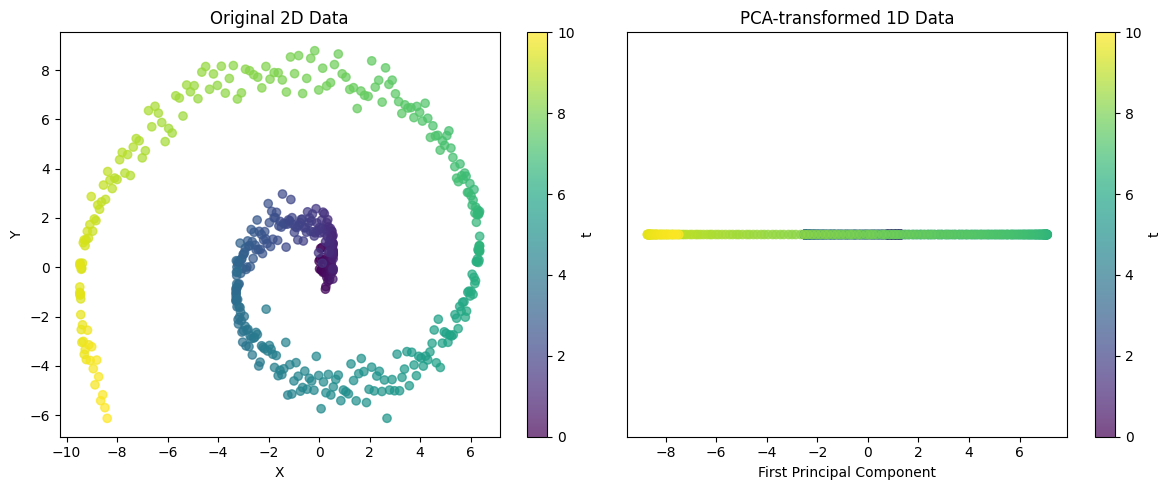

Explained variance ratio: 0.5705


In [ ]:
from dldna.chapter_02.pca import visualize_pca
visualize_pca()

这个示例展示了PCA将复杂的二维结构投影到一维的能力。对于螺旋形数据，单个主成分无法捕捉所有变化，但可以捕捉数据的主要趋势。通过解释的方差比例，可以评估这种一维表示在多大程度上保留了原始数据的结构。

这些技术是强大的工具，可以从复杂的数据中提取重要的模式。

1. 数据预处理：减少输入数据的维度
2. 模型压缩：对权重矩阵进行有效近似
3. 特征提取：识别和选择重要特征

SVD和PCA是强大的工具，可以从高维数据中提取重要的模式，并简化复杂的数据结构。

## 2.2 微积分和优化

### 2.2.1 链式法则

> **挑战问题：** 如何高效地计算复杂嵌套函数的导数？
>
> **研究者的苦恼：** 初期深度学习的研究人员必须使用反向传播算法来更新神经网络的权重。然而，由于神经网络是多层函数复杂连接的结构，因此计算每个权重关于损失函数的导数是一个非常困难的问题。特别是，随着层数加深，计算量呈指数级增长，导致学习效率低下。

深度学习中最重要的微积分规则之一就是链式法则(chain rule)。链式法则是一个强大而优雅的规则，它允许我们将复合函数的导数表示为构成函数导数的乘积。将链式法则可视化可以更容易地理解其概念。例如，假设 $z$ 是 $x$ 和 $y$ 的函数，而 $x$ 和 $y$ 分别是 $s$ 和 $t$ 的函数。这种关系可以用树形图表示。

![链式法则](../../../assets/images/02_01.chain_rule.png)

在这个图中，$z$ 关于 $s$ 的偏导数 $\frac{\partial z}{\partial s}$ 等于从 $z$ 到 $s$ 所有路径上的偏导数乘积的和。

$\frac{\partial z}{\partial s} = \frac{\partial z}{\partial x} \frac{\partial x}{\partial s} + \frac{\partial z}{\partial y} \frac{\partial y}{\partial s}$

在这个公式中，

*   $\frac{\partial z}{\partial x}$ 和 $\frac{\partial z}{\partial y}$ 表示 $z$ 如何随 $x$ 和 $y$ 变化。
*   $\frac{\partial x}{\partial s}$ 和 $\frac{\partial y}{\partial s}$ 表示 $x$ 和 $y$ 如何随 $s$ 变化。


另一个例子是使用链式法则来表达全微分的情况。考虑 $z$ 是相互独立变量的函数时的情形。在这种情况下，链式法则简化为全微分的形式。
例如，当 $z = f(x, y)$ 且 $x = g(s)$, $y = h(t)$ 时，如果 $s$ 和 $t$ 相互独立，则 $z$ 的全微分可以表示为：

![链式法则](../../../assets/images/02_02_chain_rule.png)

$dz = \frac{\partial z}{\partial x}dx + \frac{\partial z}{\partial y}dy$

这里 $dx = \frac{\partial x}{\partial s}ds$ 和 $dy = \frac{\partial y}{\partial t}dt$，因此最终形式如下：

$dz = \frac{\partial z}{\partial x}\frac{\partial x}{\partial s}ds + \frac{\partial z}{\partial y}\frac{\partial y}{\partial t}dt$


这个表达式虽然看起来与链式法则的形式相似，但实际上表示的是全微分。这里的关键点是 $s$ 和 $t$ 是独立的，因此 $\frac{\partial x}{\partial t}$ 和 $\frac{\partial y}{\partial s}$ 为 0。这种形式即为全微分。全微分表示所有独立变量的变化对函数值产生的总影响，并可表示为各变量偏导数的和。
链式法则的这种结构使得可以将复杂函数的导数分解为更简单的部分。这在深度学习中尤其重要，因为神经网络是由多个层次的函数叠加而成的结构。使用树形图可以在更复杂的情况下轻松应用链式法则。从依赖变量开始，经过中间变量，到达独立变量的所有路径，然后沿着每条路径将偏导数相乘，最后将这些结果相加即可。

链式法则是深度学习中反向传播算法的数学基础。它为能够有效地更新复杂神经网络模型的权重提供了根本支持。

### 2.2.2 梯度和雅可比矩阵

> **挑战任务**: 如何对具有不同输入输出形式的函数进行微分的一般化？
>
> **研究者的困扰**: 早期深度学习主要处理标量函数，但逐渐扩展到处理具有各种形态（向量、矩阵等）的输入输出函数。以统一的方式表示和计算这些函数的导数是开发深度学习框架的关键任务。

在深度学习中，我们处理具有不同形式的输入（标量、向量、矩阵、张量）和输出（标量、向量、矩阵、张量）的函数。因此，函数的微分（导数）表示也会有所不同。关键在于以一致的方式表达这些不同的情况，并应用链式法则(chain rule)高效计算。

#### 核心概念

*   **梯度(Gradient):** 用于对标量函数关于向量求导的表示。它是一个包含输入向量每个元素的偏导数的列向量，表示函数最陡峭的上升方向。

*   **雅可比矩阵(Jacobian Matrix):** 用于对向量函数关于向量求导的表示。它是输出向量的每个元素对输入向量的每个元素进行偏导数的结果构成的矩阵。

#### 不同输入输出形式下的导数表示

| 输入形式          | 输出形式        | 导数表示                                                                  | 维度                 |
| :----------------- | :--------------- | :------------------------------------------------------------------------ | :------------------- |
| 向量 ($\mathbf{x}$) | 向量 ($\mathbf{f}$) | 雅可比矩阵 ($\mathbf{J} = \frac{\partial \mathbf{f}}{\partial \mathbf{x}}$)          | $n \times m$          |
| 矩阵 ($\mathbf{X}$)  | 向量 ($\mathbf{f}$) | 3维张量 (通常不常用)                                                           |  -      |
| 向量 ($\mathbf{x}$)  | 矩阵 ($\mathbf{F}$) | 3维张量 (通常不常用)                                                          |      -                |
| 标量 ($x$)        | 向量 ($\mathbf{f}$) | 列向量 ($\frac{\partial \mathbf{f}}{\partial x}$)                             | $n \times 1$          |
| 向量 ($\mathbf{x}$) | 标量 ($f$)     | 梯度 ($\nabla f = \frac{\partial f}{\partial \mathbf{x}}$)          | $m \times 1$ (列向量) |
| 矩阵 ($\mathbf{X}$)  | 标量 ($f$)     | 矩阵 ($\frac{\partial f}{\partial \mathbf{X}}$)                                   | $m \times n$          |

**参考:**

*   $m$: 输入向量/矩阵的维度，$n$: 输出向量/矩阵的维度，$p, q$: 矩阵的行/列数
*   对于矩阵输入、向量/矩阵输出的情况，导数会变成三维张量。虽然深度学习框架在内部高效地处理了这些高维张量运算，但通常情况下，主要是针对向量/矩阵输入输出的雅可比矩阵/梯度计算。

#### 在深度学习中的应用

*   **反向传播算法：** 雅可比矩阵和梯度在实现深度学习中的反向传播算法时起着核心作用。通过神经网络的每一层并应用链式法则来计算损失函数关于权重的梯度，并利用这些梯度来更新权重。
*   **自动微分：** 现代深度学习框架（如TensorFlow、PyTorch等）提供了自动微分（Automatic Differentiation）功能，可以自动处理这些复杂的微分计算。用户无需直接实现复杂的微分公式，只需定义模型的结构和损失函数即可。

这样，梯度和雅可比矩阵的概念在深度学习中成为对各种形式的函数进行微分的一般化工具，并通过反向传播高效地训练模型。

::: {.callout-note collapse="true" title="点击查看内容（深入探讨：海森矩阵）"}
## 海森矩阵 (Hessian Matrix)

### 1. 海森矩阵的定义和意义

- **定义:** 海森矩阵是标量函数(scalar-valued function)的二阶偏导数(second-order partial derivatives)以矩阵形式表示。即，给定函数 $f(x_1, x_2, ..., x_n)$ 时，海森矩阵 $H$ 定义如下。

  $$
  H = \begin{bmatrix}
  \frac{\partial^2 f}{\partial x_1^2} & \frac{\partial^2 f}{\partial x_1 \partial x_2} & \cdots & \frac{\partial^2 f}{\partial x_1 \partial x_n} \\
  \frac{\partial^2 f}{\partial x_2 \partial x_1} & \frac{\partial^2 f}{\partial x_2^2} & \cdots & \frac{\partial^2 f}{\partial x_2 \partial x_n} \\
  \vdots & \vdots & \ddots & \vdots \\
  \frac{\partial^2 f}{\partial x_n \partial x_1} & \frac{\partial^2 f}{\partial x_n \partial x_2} & \cdots & \frac{\partial^2 f}{\partial x_n^2}
  \end{bmatrix}
  $$

  - 每个元素表示函数对每个变量的二次导数。
  - **对称矩阵(Symmetric Matrix):** 当二阶偏导数连续时，根据Schwarz定理，偏导数的顺序可以交换，因此海森矩阵是对称矩阵。 ($\frac{\partial^2 f}{\partial x_i \partial x_j} = \frac{\partial^2 f}{\partial x_j \partial x_i}$)

- **意义:**
    - **曲率(Curvature):** 海森矩阵包含了函数的局部曲率信息，表示函数图形在特定点处的弯曲程度。
    - **变化率的变化率:** 一阶导数(梯度, Gradient)表示函数的变化率，而海森矩阵则表示这个变化率的变化速度。

### 2. 海森矩阵与函数极值 (Critical Point) 判别

- **临界点(Critical Point):** 函数的斜率(gradient)为0的点。即所有变量的一阶偏导数值为0的点。 ($\nabla f = 0$)
- **极值判别:**
    - 海森矩阵用于判断函数在临界点处是否具有极大值(local maximum)，极小值(local minimum)，或鞍点(saddle point)。
    - **极小值(Local Minimum):** 如果海森矩阵是 **正定(positive definite)** 矩阵，则该临界点为极小值。 (所有特征值(eigenvalue)均为正数)
    - **极大值(Local Maximum):** 如果海森矩阵是 **负定(negative definite)** 矩阵，则该临界点为极大值。 (所有特征值均为负数)
    - **鞍点(Saddle Point):** 如果海森矩阵是 **不定(indefinite)** 矩阵，则该临界点为鞍点。 (既有正数也有负数的特征值)
    - **半定(Semi-definite):** 如果海森矩阵为positive/negative semi-definite，没有额外信息则无法判断极点的类型。 (特征值包含0)

### 3. 深度学习中海森矩阵的应用
- **牛顿法 (Newton's Method):**
    - 是一种用于寻找函数极值的优化算法。
    - 与使用一阶导数（梯度）的梯度下降法不同，牛顿法使用二阶导数（海森矩阵）可以更快地收敛。
    - 更新规则： $x_{k+1} = x_k - H^{-1}(x_k) \nabla f(x_k)$ （H是海森矩阵）

- **曲率矩阵:**
  - 海森矩阵可以用作表示损失函数（loss function）的曲率的曲率矩阵。
  - 利用曲率信息可以调整学习率或改进优化算法的性能。（例如，自然梯度下降法）
:::

### 2.2.3 链式法则与神经网络的反向传播

神经网络学习的核心是反向传播（Backpropagation）算法。反向传播是一种高效的方法，它将输出层产生的误差沿输入层方向传播，并更新各层的权重和偏置。在此过程中，链式法则（Chain Rule）通过将复杂复合函数的导数表示为简单导数的乘积来实现计算。

#### 神经网络中的链式法则应用

神经网络是由多个层次函数组合而成的形式。例如，两层神经网络可以如下表示：

$\mathbf{z} = f_1(\mathbf{x}; \mathbf{W_1}, \mathbf{b_1})$
$\mathbf{y} = f_2(\mathbf{z}; \mathbf{W_2}, \mathbf{b_2})$

这里，$\mathbf{x}$ 是输入，$\mathbf{z}$ 是第一层的输出（第二层的输入），$\mathbf{y}$ 是最终输出，$\mathbf{W_1}$, $\mathbf{b_1}$ 是第一层的权重和偏置，$\mathbf{W_2}$, $\mathbf{b_2}$ 是第二层的权重和偏置。

在反向传播过程中，我们需要计算损失函数 $E$ 对各个参数的梯度（$\frac{\partial E}{\partial \mathbf{W_1}}$, $\frac{\partial E}{\partial \mathbf{b_1}}$, $\frac{\partial E}{\partial \mathbf{W_2}}$, $\frac{\partial E}{\partial \mathbf{b_2}}$）。此时应用链式法则可以如下计算：

$\frac{\partial E}{\partial \mathbf{W_2}} = \frac{\partial E}{\partial \mathbf{y}} \frac{\partial \mathbf{y}}{\partial \mathbf{W_2}}$
$\frac{\partial E}{\partial \mathbf{b_2}} = \frac{\partial E}{\partial \mathbf{y}} \frac{\partial \mathbf{y}}{\partial \mathbf{b_2}}$
$\frac{\partial E}{\partial \mathbf{W_1}} = \frac{\partial E}{\partial \mathbf{y}} \frac{\partial \mathbf{y}}{\partial \mathbf{z}} \frac{\partial \mathbf{z}}{\partial \mathbf{W_1}}$
$\frac{\partial E}{\partial \mathbf{b_1}} = \frac{\partial E}{\partial \mathbf{y}} \frac{\partial \mathbf{y}}{\partial \mathbf{z}} \frac{\partial \mathbf{z}}{\partial \mathbf{b_1}}$

这样，利用链式法则可以将复杂神经网络中各参数的梯度分解为连续导数的乘积，从而高效地进行计算。2.2.4 的理论深入部分详细解释了这一过程。

#### 梯度与方向导数

*   **梯度（Gradient）：** 多变量函数对每个变量的偏导数（partial derivative）组成的向量。表示函数上升最陡的方向。
*   **方向导数（Directional Derivative）：** 表示函数在特定方向上的变化率。可以通过梯度与方向向量的点积（dot product）来计算。

#### 梯度表达的注意事项
*   **列向量 vs. 行向量:** 通常，向量表示为列向量，但在深度学习中，根据上下文也可能会表示为行向量。保持一致性很重要。（本书使用分子记法。）
*   **雅可比矩阵(Jacobian Matrix):** 对于具有多个输入变量和多个输出变量的函数（向量函数），包含所有偏导数值的矩阵。在深度学习中用于反向传播计算。

基于这些概念，下一节将详细探讨反向传播过程中的梯度计算方法，并附有具体示例。

### 2.2.4 反向传播的梯度计算

反向传播的核心是计算损失函数（Loss Function）的梯度，以更新权重。我们以一个简单的线性变换($\mathbf{y} = \mathbf{xW} + \mathbf{b}$)为例来探讨反向传播的过程。

#### 1. 反向传播的核心思想

反向传播是一种算法，在该算法中，从输出层计算的误差沿输入层方向传播，同时更新每个权重对误差的贡献。这一过程中，计算各权重关于损失函数的梯度是核心内容。

#### 2. 损失函数的梯度

如果使用均方误差（Mean Squared Error, MSE）作为损失函数，则输出 $\mathbf{y}$ 关于损失函数 $E$ 的梯度如下所示：

$E = \frac{1}{M} \sum_{i=1}^{M} (y_i - \hat{y}_i)^2$

$\frac{\partial E}{\partial \mathbf{y}} = \frac{2}{M}(\mathbf{y} - \hat{\mathbf{y}})$

其中，$y_i$ 是实际值，$\hat{y}_i$ 是模型的预测值，$M$ 是数据的数量。

#### 3. 权重的梯度

通过应用链式法则可以计算损失函数 $E$ 关于权重 $\mathbf{W}$ 的梯度：

$\frac{\partial E}{\partial \mathbf{W}} = \frac{\partial E}{\partial \mathbf{y}} \frac{\partial \mathbf{y}}{\partial \mathbf{W}}$

因为 $\mathbf{y} = \mathbf{xW} + \mathbf{b}$，所以 $\frac{\partial \mathbf{y}}{\partial \mathbf{W}} = \mathbf{x}^T$。

最终权重的梯度可以表示为：

$\frac{\partial E}{\partial \mathbf{W}} = \mathbf{x}^T \frac{\partial E}{\partial \mathbf{y}}$

#### 4. 输入的梯度

输入 $\mathbf{x}$ 关于损失函数 $E$ 的梯度用于向之前的层传播误差。

$\frac{\partial E}{\partial \mathbf{x}} = \frac{\partial E}{\partial \mathbf{y}} \frac{\partial \mathbf{y}}{\partial \mathbf{x}}$

因为 $\mathbf{y} = \mathbf{xW} + \mathbf{b}$，所以 $\frac{\partial \mathbf{y}}{\partial \mathbf{x}} = \mathbf{W}^T$。

因此，输入的梯度为：

$\frac{\partial E}{\partial \mathbf{x}} = \frac{\partial E}{\partial \mathbf{y}} \mathbf{W}^T$

#### 5. 总结

反向传播通过以下关键步骤实现：
1.  **前向传播(Forward Propagation):** 将输入数据 $\mathbf{x}$ 通过神经网络计算预测值 $\hat{\mathbf{y}}$。
2.  **损失函数计算:** 比较预测值 $\hat{\mathbf{y}}$ 和实际值 $\mathbf{y}$ 来计算损失 $E$。
3.  **反向传播(Backward Propagation):**
    *   计算输出层的损失函数梯度 $\frac{\partial E}{\partial \mathbf{y}}$。
    *   利用链式法则计算权重的梯度 $\frac{\partial E}{\partial \mathbf{W}} = \mathbf{x}^T \frac{\partial E}{\partial \mathbf{y}}$。
    *   计算输入的梯度 $\frac{\partial E}{\partial \mathbf{x}} = \frac{\partial E}{\partial \mathbf{y}} \mathbf{W}^T$ 并将误差传播到前一层。
4.  **权重更新:** 使用计算出的梯度通过梯度下降等优化算法更新权重。

反向传播算法是深度学习模型训练的核心，通过该算法可以有效地近似复杂的非线性函数。

::: {.callout-note collapse="true" title="点击查看内容（深入探讨：用于反向传播的梯度计算）"}
反向传播的核心是计算损失函数（Loss Function）的梯度以更新权重。以简单的线性变换($\mathbf{y} = \mathbf{xW} + \mathbf{b}$)为例，我们将详细解释反向传播过程。这里尽可能详细地展开计算过程。

#### 损失函数的梯度

神经网络学习的目标是使损失函数 $E$ 最小化。当使用均方误差（MSE）作为损失函数时，情况如下所示。

$E = f(\mathbf{y}) = \frac{1}{M} \sum_{i=1}^{M} (y_i - \hat{y}_i)^2$

其中 $y_i$ 是实际值，$\hat{y}_i$ 是预测值，$M$ 是数据的数量（或输出向量的维度）。

$E$ 关于 $\mathbf{y}$ 的导数（derivative）如下所示。

$\frac{\partial E}{\partial \mathbf{y}} = \frac{2}{M} (\mathbf{y} - \hat{\mathbf{y}})$

其中，$\mathbf{y}$ 是神经网络的输出向量，$\hat{\mathbf{y}}$ 是实际值（目标）向量。因为 $y_i$ 是常数（每个目标元素），所以只有关于 $\mathbf{y}$ 的偏导数留下。

**注意:** 第1章的例子代码中使用了 $-\frac{2}{M}$ 项，这是因为损失函数定义中包含了负号(-)。在这里我们使用一般的 MSE 定义，因此使用正数 $\frac{2}{M}$。实际学习时会乘以学习率（learning rate），所以这个常数的绝对大小并不重要。

#### 关于权重的损失函数梯度

现在，我们将计算关于权重 $\mathbf{W}$ 的损失函数 $E$ 的梯度。$E = f(\mathbf{y})$ 且 $\mathbf{y} = \mathbf{xW} + \mathbf{b}$。$\mathbf{x}$ 是输入向量，$\mathbf{W}$ 是权重矩阵，$\mathbf{b}$ 是偏置向量。

**计算图:**

为了直观地表示反向传播过程，可以使用计算图。（插入计算图）

$E$ 是一个标量值，需要对每个 $w_{ij}$（权重矩阵 $\mathbf{W}$ 的每个元素）求 $E$ 的偏导数。$\mathbf{W}$ 是 (输入维度) x (输出维度) 大小的矩阵。例如，如果输入为三维($x_1, x_2, x_3$)，输出为二维($y_1, y_2$)，则 $\mathbf{W}$ 为 3x2 矩阵。

$\frac{\partial E}{\partial \mathbf{W}} = \begin{bmatrix}
\frac{\partial E}{\partial w_{11}} & \frac{\partial E}{\partial w_{12}} \\
\frac{\partial E}{\partial w_{21}} & \frac{\partial E}{\partial w_{22}} \\
\frac{\partial E}{\partial w_{31}} & \frac{\partial E}{\partial w_{32}}
\end{bmatrix}$

$E$ 关于 $\mathbf{y}$ 的导数可以表示为行向量：$\frac{\partial E}{\partial \mathbf{y}} = \begin{bmatrix} \frac{\partial E}{\partial y_1} & \frac{\partial E}{\partial y_2} \end{bmatrix}$（使用分子记法）。严格来说，梯度应表示为列向量，但这里为了计算方便而使用行向量。

根据链式法则，
$\frac{\partial E}{\partial \mathbf{W}} = \frac{\partial E}{\partial \mathbf{y}} \frac{\partial \mathbf{y}}{\partial \mathbf{W}}$

$\frac{\partial E}{\partial w_{ij}} = \sum_k \frac{\partial E}{\partial y_k} \frac{\partial y_k}{\partial w_{ij}}$ (这里 $k$ 是输出向量 $\mathbf{y}$ 的索引)

上面的式子展开为，

$\frac{\partial E}{\partial \mathbf{W}} = \frac{\partial E}{\partial y_1} \frac{\partial y_1}{\partial \mathbf{W}} + \frac{\partial E}{\partial y_2} \frac{\partial y_2}{\partial \mathbf{W}}$

现在需要计算 $\frac{\partial y_k}{\partial w_{ij}}$。由于 $\mathbf{y} = \mathbf{xW} + \mathbf{b}$，

$y_1 = x_1w_{11} + x_2w_{21} + x_3w_{31} + b_1$
$y_2 = x_1w_{12} + x_2w_{22} + x_3w_{32} + b_2$

$\frac{\partial y_1}{\partial w_{ij}} = \begin{bmatrix}
\frac{\partial y_1}{\partial w_{11}} & \frac{\partial y_1}{\partial w_{12}} \\
\frac{\partial y_1}{\partial w_{21}} & \frac{\partial y_1}{\partial w_{22}} \\
\frac{\partial y_1}{\partial w_{31}} & \frac{\partial y_1}{\partial w_{32}}
\end{bmatrix} =
\begin{bmatrix}
x_1 & 0 \\
x_2 & 0 \\
x_3 & 0
\end{bmatrix}$

$\frac{\partial y_2}{\partial w_{ij}} = \begin{bmatrix}
0 & x_1 \\
0 & x_2 \\
0 & x_3
\end{bmatrix}$

因此，

$\frac{\partial E}{\partial \mathbf{W}} = \frac{\partial E}{\partial y_1} \begin{bmatrix}
x_1 & 0 \\
x_2 & 0 \\
x_3 & 0
\end{bmatrix} + \frac{\partial E}{\partial y_2} \begin{bmatrix}
0 & x_1 \\
0 & x_2 \\
0 & x_3
\end{bmatrix} = \begin{bmatrix}
\frac{\partial E}{\partial y_1}x_1 & \frac{\partial E}{\partial y_2}x_1 \\
\frac{\partial E}{\partial y_1}x_2 & \frac{\partial E}{\partial y_2}x_2 \\
\frac{\partial E}{\partial y_1}x_3 & \frac{\partial E}{\partial y_2}x_3
\end{bmatrix} = \begin{bmatrix} x_1 \\ x_2 \\ x_3 \end{bmatrix} \begin{bmatrix} \frac{\partial E}{\partial y_1} & \frac{\partial E}{\partial y_2} \end{bmatrix} = \mathbf{x}^T \frac{\partial E}{\partial \mathbf{y}}$

**泛化:**

当输入为 $1 \times m$ 行向量 $\mathbf{x}$，输出为 $1 \times n$ 行向量 $\mathbf{y}$ 时，权重 $\mathbf{W}$ 是 $m \times n$ 矩阵。此时，
$\frac{\partial E}{\partial \mathbf{W}} = \mathbf{x}^T \frac{\partial E}{\partial \mathbf{y}}$

#### 输入的损失函数梯度

输入 $\mathbf{x}$ 的损失函数 $E$ 的梯度同样可以使用链式法则进行计算。

$\frac{\partial E}{\partial \mathbf{x}} = \frac{\partial E}{\partial \mathbf{y}} \frac{\partial \mathbf{y}}{\partial \mathbf{x}}$

由于 $\mathbf{y} = \mathbf{xW} + \mathbf{b}$，因此 $\frac{\partial \mathbf{y}}{\partial \mathbf{x}} = \mathbf{W}^T$。

因此，

$\frac{\partial E}{\partial \mathbf{x}} = \frac{\partial E}{\partial \mathbf{y}} \mathbf{W}^T$

#### 偏置的梯度

偏置 $\mathbf{b}$ 的损失函数的梯度如下所示。

 $\frac{\partial E}{\partial \mathbf{b}} = \frac{\partial E}{\partial \mathbf{y}} \frac{\partial \mathbf{y}}{\partial \mathbf{b}}$

由于 $\mathbf{y} = \mathbf{xW} + \mathbf{b}$，因此 $\frac{\partial \mathbf{y}}{\partial \mathbf{b}} = \begin{bmatrix} 1 & 1 & \dots & 1\end{bmatrix}$（全为1的 $1 \times n$ 行向量）

$\frac{\partial E}{\partial \mathbf{b}} = \frac{\partial E}{\partial \mathbf{y}}$

#### 总结及进一步说明
1. **权重的梯度:** $\frac{\partial E}{\partial \mathbf{W}} = \mathbf{x}^T \frac{\partial E}{\partial \mathbf{y}}$
   * 通过输入向量 $\mathbf{x}$ 的转置（transpose）与输出损失函数的梯度 ($\frac{\partial E}{\partial \mathbf{y}}$，这里表示为行向量) 的矩阵乘积计算。

2. **输入的梯度:** $\frac{\partial E}{\partial \mathbf{x}} = \frac{\partial E}{\partial \mathbf{y}} \mathbf{W}^T$
    * 通过输出损失函数的梯度 ($\frac{\partial E}{\partial \mathbf{y}}$) 和权重矩阵 $\mathbf{W}$ 的转置（transpose）的矩阵乘积计算。该结果反向传播到前一层 (layer)，用于更新该层的权重。

3. **偏置的梯度**:  $\frac{\partial E}{\partial \mathbf{b}} = \frac{\partial E}{\partial \mathbf{y}}$
  * 等于输出损失函数的梯度。

4. **梯度的应用:** 这样计算出的梯度在诸如梯度下降 (Gradient Descent) 等优化算法中用于更新权重和偏置。每个参数沿着梯度的反方向进行更新以最小化损失函数。
5. **记法:** 上述描述中，我们使用了分子布局(numerator layout)来计算梯度。也可以使用分母布局(denominator layout)，但最终会得到相同的更新规则。重要的是使用一致的记法。本书采用分子布局。

通过这种数学过程，深度学习模型能够从输入数据学习到输出数据的复杂非线性转换。
:::

## 2.3 概率与统计

深度学习深深植根于处理数据不确定性概率和统计理论。本章将探讨概率分布、期望值、贝叶斯定理、最大似然估计等核心概念。这些概念对于理解模型的学习和推理过程至关重要。

### 2.3.1 概率分布与期望值

> **挑战任务**: 如何对实际数据的不确定性进行数学建模？
>
> **研究者的苦恼**: 初期的机器学习研究人员意识到现实世界的数据无法用确定性（deterministic）规则来描述。这是因为数据中存在测量误差、噪声和不可预测的变化。需要一种数学工具来量化这种不确定性和将其反映在模型中。

概率分布表示所有可能的结果及其发生的概率。可以分为离散概率分布和连续概率分布。

#### 离散概率分布

离散概率分布处理的是随机变量可以取的值是有限或可数的情况。其特点是每个可能的结果都有一个明确的概率。

数学上，离散概率分布由概率质量函数（PMF）表示。

$$P(X = x) = p(x)$$

其中 p(x) 是 X 取值为 x 的概率。主要性质如下：

1. 对于所有 x, $0 ≤ p(x) ≤ 1$
2. $\sum_{x} p(x) = 1$

典型的例子包括伯努利分布、二项分布和泊松分布。

掷骰子的概率质量函数如下所示。

$$P(X = x) = \begin{cases} 
\frac{1}{6} & \text{if } x \in \{1, 2, 3, 4, 5, 6\} \
0 & \text{otherwise}
\end{cases}$$

离散概率分布在机器学习和深度学习中广泛应用于分类问题、强化学习、自然语言处理等领域。以下是模拟掷骰子的结果。

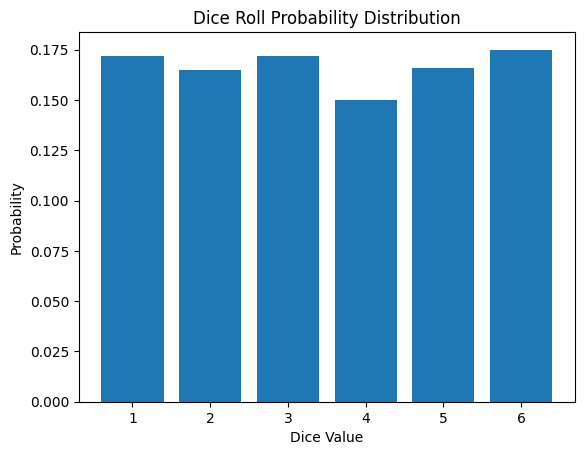

In [ ]:
from dldna.chapter_02.statistics import simulate_dice_roll

simulate_dice_roll()

#### 连续概率分布

连续概率分布处理随机变量可以取连续值的情况。与离散概率分布不同，特定点的概率为0，而是处理区间内的概率。数学上，连续概率分布由概率密度函数（Probability Density Function, PDF）表示。

$$f(x) = \lim_{\Delta x \to 0} \frac{P(x < X \leq x + \Delta x)}{\Delta x}$$

这里 f(x) 表示在 x 附近的概率密度。主要性质如下：

1. 对所有 x，f(x) ≥ 0
2. $\int_{-\infty}^{\infty} f(x) dx = 1$

典型的例子包括正态分布、指数分布和伽玛分布。

正态分布的概率密度函数如下：

$$f(x) = \frac{1}{\sigma\sqrt{2\pi}} e^{-\frac{(x-\mu)^2}{2\sigma^2}}$$

这里 μ 是均值，σ 是标准差。

连续概率分布在回归问题、信号处理、时间序列分析等各种机器学习和深度学习应用中起着重要作用。

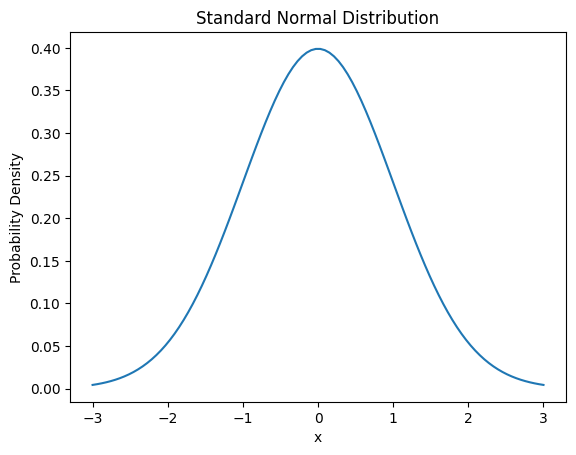

In [ ]:
from dldna.chapter_02.statistics import plot_normal_distribution

plot_normal_distribution()

#### 期望值

期望值是表示概率分布中心趋势的一个重要概念。它可以解释为随机变量所有可能值的加权平均。对于离散概率分布，期望值可以如下计算。

$$E[X] = \sum_{i} x_i P(X = x_i)$$

其中 $x_i$ 是随机变量 X 的可能取值，$P(X = x_i)$ 是该值的概率。对于连续概率分布，期望值通过积分计算。

$$E[X] = \int_{-\infty}^{\infty} x f(x) dx$$

其中 $f(x)$ 是概率密度函数。期望值具有以下重要性质：

1. 线性：$E[aX + b] = aE[X] + b$
2. 独立随机变量乘积的期望值：$E[XY] = E[X]E[Y]$ （当 X 和 Y 相互独立时）

在深度学习中，期望值用于损失函数最小化或模型参数估计的核心部分。例如，均方误差 (MSE) 定义如下。

$$MSE = E[(Y - \hat{Y})^2]$$

其中 $Y$ 是实际值，$\hat{Y}$ 是预测值。

期望值的概念为诸如随机梯度下降（Stochastic Gradient Descent）等优化算法提供了理论基础，并在强化学习中的价值函数估计中发挥了重要作用。

In [ ]:
from dldna.chapter_02.statistics import calculate_dice_expected_value

calculate_dice_expected_value()

Expected value of dice roll: 3.5


这些概率和统计的基本概念在深度学习模型的设计、学习和评估过程中起着核心作用。在下一节中，我们将基于此了解贝叶斯定理和最大似然估计。

### 2.3.2 贝叶斯定理和最大似然估计

> **挑战任务:** 如何利用有限的数据最好地估计模型的参数？
>
> **研究者的困扰:** 初期的统计学家和机器学习研究人员经常面临只能使用有限数据构建模型的情况。在数据不足的情况下准确估计模型参数是非常困难的问题。除了依赖数据，还需要利用先验知识或信念来提高估计的准确性。

贝叶斯定理和最大似然估计是概率论和统计学的核心概念，在深度学习中广泛应用于模型训练和推理。

#### 贝叶斯定理

贝叶斯定理提供了一种计算条件概率的方法。它用于在给定新证据时更新假设的概率。贝叶斯定理的数学表达如下：

$$P(A|B) = \frac{P(B|A)P(A)}{P(B)}$$

其中：
- $P(A|B)$ 是给定 B 时 A 的概率（后验概率）
- $P(B|A)$ 是给定 A 时 B 的概率（似然）
- $P(A)$ 是 A 的概率（先验概率）
- $P(B)$ 是 B 的概率（证据）

贝叶斯定理在机器学习中如下应用：

1. 分类问题：在朴素贝叶斯分类器中计算属于特定类别的概率。
2. 参数估计：用于计算模型参数的后验分布。
3. 决策理论：用于在不确定性下做出最优决策。

#### 最大似然估计

最大似然估计（Maximum Likelihood Estimation, MLE）是寻找最能解释给定数据的模型参数的方法。在深度学习的背景下，这意味着找到使神经网络能够最好地解释观察到的数据的权重和偏置。也就是说，最大似然估计是找到使模型生成训练数据的概率最大的参数，这直接与模型的学习过程相关联。
数学上，给定数据 $X = (x_1, ..., x_n)$ 时，关于参数 $\theta$ 的似然函数定义如下：

$$L(\theta|X) = P(X|\theta) = \prod_{i=1}^n P(x_i|\theta)$$

最大似然估计值 $\hat{\theta}_{MLE}$ 如下计算：

$$\hat{\theta}_{MLE} = \operatorname{argmax}_{\theta} L(\theta|X)$$

实际上，最大化对数似然在计算上更为方便。

$$\hat{\theta}_{MLE} = \operatorname{argmax}_{\theta} \log L(\theta|X) = \operatorname{argmax}_{\theta} \sum_{i=1}^n \log P(x_i|\theta)$$

使用对数似然有几个重要的数学优势：

1. 将乘法转换为加法：根据对数函数的特性 $\log(ab) = \log(a) + \log(b)$，可以将概率的乘积转换为对数概率的和。这简化了计算并提高了数值稳定性。
2. 提高数值稳定性：处理非常小的概率值时，乘法可能导致下溢。使用对数可以避免这种问题。
3. 简化微分：在优化过程中进行微分计算时，使用对数函数可以使计算更加简单。特别是对于指数分布的情况，这一点尤为突出。
4. 单调递增函数：对数函数是单调递增的，因此最大化似然和最大化对数似然是等效的。

由于这些原因，在深度学习和其他许多机器学习算法中，通常使用对数似然进行优化。

最大似然估计在深度学习中如下应用：
1. 模型训练：在学习神经网络的权重时，最小化损失函数的过程实际上等同于最大似然估计。
2. 概率建模：用于生成模型中数据分布的估计。
3. 超参数调优：可以用于选择模型的超参数。

贝叶斯定理和最大似然估计密切相关。在贝叶斯估计中，如果先验概率为均匀分布，则最大后验概率（MAP）估计与最大似然估计相同。数学上表示为，$P(\theta|X) \propto P(X|\theta)P(\theta)$ 中 $P(\theta)$ 为常数时，$\operatorname{argmax}_{\theta} P(\theta|X) = \operatorname{argmax}_{\theta} P(X|\theta)P(\theta)$。这意味着当先验概率不提供关于参数的额外信息时，基于数据的估计（MLE）与贝叶斯估计（MAP）一致。

这些概念对于理解和优化深度学习模型的训练和推理过程至关重要。下一节将介绍信息论的基础知识。

::: {.callout-note collapse="true" title="深度探讨：贝叶斯定理的深入分析"}
## 贝叶斯定理 (Bayes' Theorem) - 深度分析

### 1. 贝叶斯定理的严格推导及概率空间

- **概率空间 (Probability Space):** 贝叶斯定理在概率空间 $(\Omega, \mathcal{F}, P)$ 上定义。
    - $\Omega$: 样本空间 (Sample Space, 所有可能结果的集合)
    - $\mathcal{F}$: 事件空间 (Event Space, 样本空间的部分集族，$\sigma$-代数)
    - $P$: 概率测度 (Probability Measure, 将概率分配给事件空间中每个事件的函数)

- **条件概率的严格定义:**
    - 对于事件 $B \in \mathcal{F}$ 且 $P(B) > 0$，事件 $A \in \mathcal{F}$ 的条件概率 $P(A|B)$ 定义如下。
      $P(A|B) = \frac{P(A \cap B)}{P(B)}$

- **联合概率:**
    - 两个事件 $A, B \in \mathcal{F}$ 的联合概率 $P(A \cap B)$ 表示这两个事件同时发生的概率。
    - 利用条件概率的定义，可以如下表示。
        - $P(A \cap B) = P(A|B)P(B)$
        - $P(A \cap B) = P(B|A)P(A)$

- **贝叶斯定理推导:**
   1. $P(A|B)P(B) = P(B|A)P(A)$ (联合概率的两种表示)
   2. $P(A|B) = \frac{P(B|A)P(A)}{P(B)}$ (两边同时除以 $P(B)$, $P(B) > 0$)

### 2. 贝叶斯定理各项的深度意义及统计解释

- **$P(A|B)$: 后验概率 (Posterior Probability)**
    - **解释:** 在获得观测数据 $B$ 后，关于假设 $A$ 的更新后的概率分布。表示基于数据的推理(inference)结果。
    - **贝叶斯观点:** 后验概率通过先验概率和似然函数的结合来量化不确定性，并为决策(decision making)提供基础。

- **$P(B|A)$: 似然，条件密度 (Likelihood)**
    - **解释:** 在假设 $A$ 成立的情况下，观测数据 $B$ 出现的概率。表示假设 $A$ 对数据 $B$ 的解释能力。
    - **频率学派 vs. 贝叶斯观点:**
        - **频率学派:** 似然是关于固定参数(parameter)的函数，用于描述数据的分布。
        - **贝叶斯:** 似然是在给定数据的情况下提供关于参数的信息的函数。

- **$P(A)$: 先验概率 (Prior Probability)**
    - **解释:** 在获得观测数据 $B$ 之前，表示对假设 $A$ 的先验信念(prior belief)的概率分布。
    - **主观 vs. 客观先验概率:**
        - **主观 (Subjective):** 基于专家知识、先前经验等设定。
        - **客观 (Objective):** 使用均匀分布(uniform distribution)或无信息先验分布(non-informative prior)等包含最少信息的先验分布。
- **$P(B)$: 证据 (Evidence) 或者 边缘似然度 (Marginal Likelihood)**
    - **解释:** 在所有可能的假设下观察数据 $B$ 出现的概率。作为将 $P(A|B)$ 转化为概率分布的归一化常数(normalizing constant)。
    - **计算:**
      $P(B) = \sum_{A'} P(B|A')P(A')$ (离散随机变量)
      $P(B) = \int P(B|A)p(A) dA$ (连续随机变量, $p(A)$ 是概率密度函数)
    - **模型比较:** 用于计算贝叶斯因子(Bayes factor)等，以比较不同模型的证据。

### 3. 贝叶斯定理与贝叶斯推断 (Bayesian Inference)

- **核心:** 贝叶斯定理是贝叶斯推断的核心原理，它在给定数据的情况下推理参数(parameter)或假设的概率分布。
- **过程:**
    1. **先验:** 设定参数 $\theta$ 的先验分布 $p(\theta)$。
    2. **似然:** 定义在给定参数 $\theta$ 下数据 $x$ 被观察到的概率 $p(x|\theta)$ (似然函数)。
    3. **后验:** 利用贝叶斯定理计算后验分布 $p(\theta|x)$。
       $p(\theta|x) = \frac{p(x|\theta)p(\theta)}{p(x)} = \frac{p(x|\theta)p(\theta)}{\int p(x|\theta')p(\theta') d\theta'}$
    4. **推断:** 基于后验分布进行参数估计、区间估计、假设检验等。

- **迭代更新:** 每次有新数据进来时，可以使用之前的后验分布作为新的先验分布不断更新信念。(顺序贝叶斯更新)

### 4. 贝叶斯定理的扩展与应用

- **连续随机变量:** 利用概率密度函数的贝叶斯定理
- **共轭先验 (Conjugate Prior):**
    - 使后验分布和先验分布属于同一分布族(family)的先验分布。由于计算上的便利性，被广泛使用。(例如：Beta 分布 - Bernoulli 分布, Gamma 分布 - Poisson 分布)
- **变分贝叶斯 (Variational Bayes):**
    - 近似复杂后验分布的方法。
    - 找到与后验分布相似的、易于处理的分布，并通过最小化两个分布之间的 Kullback-Leibler divergence 来近似。
- **马尔可夫链蒙特卡洛 (Markov Chain Monte Carlo, MCMC):**
    - 从后验分布中抽取样本(sample)，以估计后验分布的特性。
    - Metropolis-Hastings 算法、Gibbs sampling 等。

- **在深度学习中的应用:**
    - **贝叶斯神经网络:** 将神经网络的权重(weight)视为随机变量，量化预测的不确定性。
    - **高斯过程:** 利用核(kernel)定义函数空间上的先验分布，并通过贝叶斯定理计算预测分布。
:::

::: {.callout-note collapse="true" title="深度探讨：最大似然估计（MLE）的深入分析及与MAP的比较（硕士及以上）"}
## 最大似然估计 (Maximum Likelihood Estimation, MLE) - 深度分析及与MAP的比较

### 1. MLE计算的具体示例

MLE是一种寻找最能解释给定数据的参数的方法。它找到使观察数据的似然性（likelihood）最大化的参数值。

- **似然函数 (Likelihood Function):**
    - 假设数据 $x_1, x_2, ..., x_n$ 是独立同分布(i.i.d)地从同一个概率分布中抽取，那么似然函数可以定义为：
        $$L(\theta; x_1, ..., x_n) = \prod_{i=1}^{n} p(x_i | \theta)$$
        -   $\theta$: 参数 (parameter)
        -   $p(x_i | \theta)$: 在给定参数 $\theta$ 的情况下，数据 $x_i$ 出现的概率（或概率密度）

- **对数似然函数 (Log-Likelihood Function):**
    - 为了计算方便，通常使用取自然对数后的对数似然函数。
        $$l(\theta; x_1, ..., x_n) = \log L(\theta; x_1, ..., x_n) = \sum_{i=1}^{n} \log p(x_i | \theta)$$
    - 取自然对数不会改变最大值的位置，因此也可以通过最大化对数似然来寻找参数。

- **MLE计算步骤:**
    1. 定义给定数据和概率分布模型的似然函数。
    2. 对似然函数取自然对数以获得对数似然函数。
    3. 对参数 $\theta$ 求导对数似然函数。
    4. 寻找使导数值为0的 $\theta$ 值。（必要时使用二阶导数来判断极大/极小值）
    5. 找到的 $\theta$ 值即为MLE估计值。

- **具体示例:**

    - **正态分布 (Normal Distribution):**
        - 假设数据 $x_1, ..., x_n$ 遵循均值为 $\mu$，方差为 $\sigma^2$ 的正态分布。
        - 对数似然函数：
            $$l(\mu, \sigma^2; x_1, ..., x_n) = -\frac{n}{2}\log(2\pi\sigma^2) - \frac{1}{2\sigma^2}\sum_{i=1}^{n}(x_i - \mu)^2$$
        - 分别对 $\mu$ 和 $\sigma^2$ 求偏导并找到使它们为0的点，MLE估计值如下：
            -   $\hat{\mu}_{MLE} = \frac{1}{n}\sum_{i=1}^{n} x_i$ （样本均值）
            -   $\hat{\sigma}^2_{MLE} = \frac{1}{n}\sum_{i=1}^{n} (x_i - \hat{\mu}_{MLE})^2$ （样本方差）

    - **伯努利分布 (Bernoulli Distribution):**
        - 假设数据 $x_1, ..., x_n$ 遵循成功概率为 $p$ 的伯努利分布。($x_i = 1$ 表示成功，$x_i = 0$ 表示失败)
        - 对数似然函数：
            $$ l(p; x_1, ..., x_n) = \sum_{i=1}^n [x_i \log p + (1-x_i) \log (1-p)] $$
        - 对 $p$ 求导并找到使它为0的点，MLE估计值如下：
            -   $\hat{p}_{MLE} = \frac{1}{n}\sum_{i=1}^{n} x_i$ （成功次数 / 总试验次数）

### 2. MLE的优点和缺点
- **优点:**
    -   **计算的简便性:** 可以通过相对简单的计算进行参数估计。特别是在指数族（exponential family）分布的情况下。
    -   **渐近性质 (Asymptotic Properties):** （以下详细说明）
        -   **一致性 (Consistency):** 随着样本量增大，MLE 估计值会收敛于实际参数。
        -   **渐近正态性 (Asymptotic Normality):** 随着样本量增大，MLE 估计值趋近于正态分布。
        -   **效率 (Efficiency):** 渐近地具有最小方差的无偏估计（Cramér–Rao 下限）。

- **缺点:**
    -   **过拟合 (Overfitting) 的可能性:** 特别是当样本量较小时，可能过度适应数据而导致泛化性能下降。
    -   **对异常值(Outlier)敏感:** 存在异常值时，MLE 估计值可能会严重扭曲。
    -   **并非适用于所有分布:** MLE 需要给定概率模型（probabilistic model）才能应用（不适用于非参数方法）。
    -   **可能存在偏倚 (Bias):** 在某些情况下，MLE 估计量可能是有偏的（例如，正态分布的方差估计）。

### 3. 最大后验概率估计 (Maximum A Posteriori, MAP) 的比较

- **MAP:** 基于贝叶斯定理，结合先验概率(prior probability)和似然性(likelihood)，寻找使后验概率(posterior probability)最大化的参数。

- **MAP 估计:**
    $$
    \hat{\theta}_{MAP} = \arg\max_{\theta} p(\theta|x) = \arg\max_{\theta} \frac{p(x|\theta)p(\theta)}{p(x)} = \arg\max_{\theta} p(x|\theta)p(\theta)
    $$
    -   $p(\theta|x)$: 后验概率 (Posterior Probability)
    -   $p(x|\theta)$: 似然性 (Likelihood)
    -   $p(\theta)$: 先验概率 (Prior Probability)
    -   $p(x)$: 证据 (Evidence, 是一个常数，因此可以忽略)

- **MLE vs. MAP:**
| 特征           | MLE                                                                  | MAP                                                                    |
| -------------- | -------------------------------------------------------------------- | ---------------------------------------------------------------------- |
| **基础**       | 频率学派 (Frequentist)                                                  | 贝叶斯学派 (Bayesian)                                                       |
| **目标**        | 似然最大化                                                         | 后验概率最大化                                                        |
| **先验概率**   | 不考虑                                                             | 考虑                                                                 |
| **结果**        | 点估计 (Point Estimate)                                                 | 点估计（通常）或分布估计（贝叶斯推理情况下）                  |
| **过拟合**    | 过拟合可能性高                                                       | 通过先验概率防止过拟合可能（例如，正则化效果）                |
| **计算复杂度** | 一般较低                                                            | 根据先验概率的复杂度可能会增加（特别是当没有共轭先验分布时） |

-   **先验概率的影响:**
    -   **非信息性先验分布 (Non-informative Prior):** 当先验概率遵循均匀分布，例如 $p(\theta) \propto 1$（常数），MAP估计与MLE估计相同。
    -   **信息性先验分布 (Informative Prior):** 当先验概率遵循特定分布时（如正态分布、贝塔分布），MAP估计会受到先验概率的影响，与MLE估计不同。 先验分布表示的先验信念越强，后验就越接近先验。

### 4. MLE的渐近性质 (Asymptotic Property)

- **一致性 (Consistency):**
    - 当样本大小 $n$ 趋向于无穷大时，MLE估计量 $\hat{\theta}_{MLE}$ 概率收敛（converge in probability）到实际参数 $\theta_0$。
        $$\hat{\theta}_{MLE} \xrightarrow{p} \theta_0 \text{ as } n \rightarrow \infty$$
- **渐近正态性 (Asymptotic Normality):**
  - 当样本大小 $n$ 足够大时，MLE 估计量 $\hat{\theta}_{MLE}$ 的分布可以近似为以下正态分布。
    $$\sqrt{n}(\hat{\theta}_{MLE} - \theta_0) \xrightarrow{d} N(0, I(\theta_0)^{-1})$$
     - $I(\theta_0)$: Fisher Information Matrix (FIM)
        - $I(\theta) = -E[\frac{\partial^2}{\partial \theta^2} l(\theta; x_1, ...,x_n)]$（单参数情况）
        - FIM 表示对数似然函数的曲率(curvature)，反映了关于参数的信息量。
- **效率 (Efficiency):**
    - MLE 是渐近地达到 Cramér–Rao 下限(Cramér–Rao lower bound, CRLB) 的有效估计量。与其他无偏估计量(unbiased estimator)相比，它在渐近时具有最小的方差。
:::

### 2.3.3 信息论基础

> **挑战：** 如何测量信息量并量化不确定性？
>
> **研究者的困惑：** 克劳德·香农面临关于通信系统中信息高效传输和压缩的基本问题。他需要一种理论依据来量化信息，确定在不失真信息的情况下可以将数据压缩到什么程度，以及通过噪声信道可以稳定地传输多少信息。

信息论是关于数据压缩、传输和存储的数学理论，在深度学习中对模型性能评估和优化起着重要作用。本节我们将探讨信息论的核心概念：熵、互信息量和KL散度。

#### 熵

熵是衡量信息不确定性的指标。概率分布P的熵H(P)定义如下：

$$H(P) = -\sum_{x} P(x) \log P(x)$$

其中，x表示所有可能事件。熵的主要特性包括：

1.  非负性: $H(P) ≥ 0$
2.  均匀分布时最大：当所有事件的概率相等时，熵达到最大。
3.  确定性事件的熵为0: 当$P(x) = 1$时，$H(P) = 0$

在深度学习中，熵主要作为分类问题损失函数的基础——交叉熵。以下示例计算了不同概率分布的熵，并可视化了二项分布的熵。

Entropy of fair coin: 0.69
Entropy of biased coin: 0.33
Entropy of fair die: 1.39


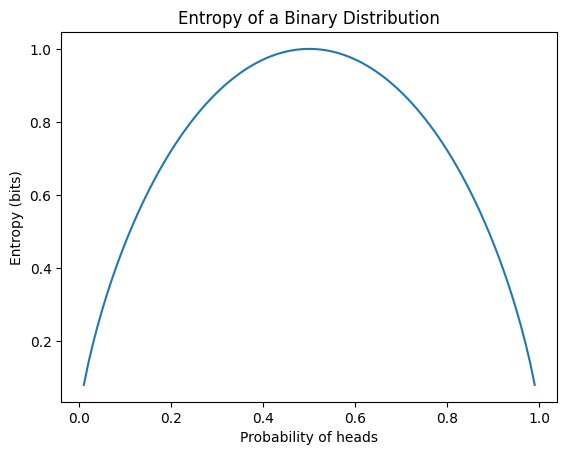

In [ ]:
from dldna.chapter_02.information_theory import calculate_entropy
calculate_entropy()

#### 互信息

互信息（Mutual Information）测量两个随机变量X和Y之间的相互依赖性。数学上定义如下。

$$I(X;Y) = \sum_{x}\sum_{y} P(x,y) \log \frac{P(x,y)}{P(x)P(y)}$$

互信息的主要特性包括：

1.  非负性: $I(X;Y) \ge 0$
2.  对称性: $I(X;Y) = I(Y;X)$
3.  X和Y独立时为0: 如果X和Y独立，则$I(X;Y) = 0$

互信息在特征选择、降维等机器学习任务中得到广泛应用。下面的示例计算并可视化了一个简单的联合概率分布的互信息。

Mutual Information: 0.0058


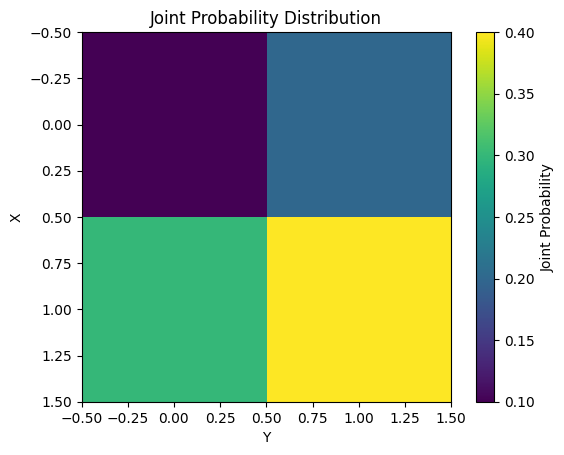

In [ ]:
from dldna.chapter_02.information_theory import mutual_information_example
mutual_information_example()

#### KL 散度

KL(Kullback-Leibler)散度是一种衡量两个概率分布 P 和 Q 之间差异的方法。P 关于 Q 的 KL 散度定义如下。

$$D_{KL}(P||Q) = \sum_{x} P(x) \log \frac{P(x)}{Q(x)}$$

KL 散度的主要特性包括：

1. 非负性: $D_{KL}(P||Q) \ge 0$
2. 当且仅当 P = Q 时为 0: $D_{KL}(P||Q) = 0$ if and only if $P = Q$
3. 非对称性: 通常情况下，$D_{KL}(P||Q) \ne D_{KL}(Q||P)$

在深度学习中，KL 散度有以下应用：

1. 变分推断：用于最小化近似分布与实际分布之间的差异。
2. 模型压缩：在教师-学生网络中用于知识蒸馏。
3. 异常检测：用于衡量与正常数据分布的差异。

信息论的概念之间是密切相关的。例如，互信息可以表示为熵和条件熵之差。

$I(X;Y) = H(X) - H(X|Y)$

此外，KL 散度可以表示为交叉熵和熵之差。

$D_{KL}(P||Q) = H(P,Q) - H(P)$

其中 $H(P,Q)$ 是 P 和 Q 的交叉熵。以下计算两个概率分布之间的 KL 散度并可视化这些分布。

KL(P||Q): 0.0823
KL(Q||P): 0.0872


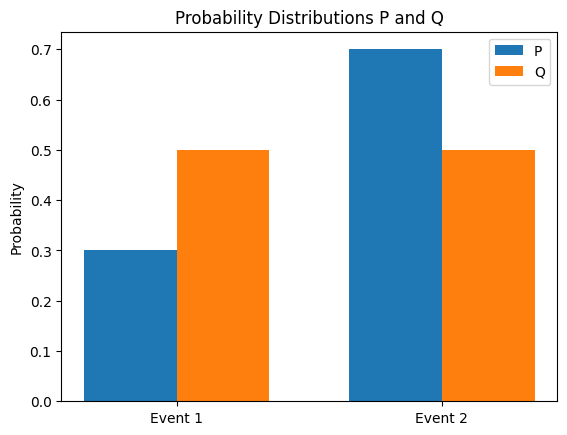

In [ ]:
from dldna.chapter_02.information_theory import kl_divergence_example
kl_divergence_example()

这些信息理论的概念在深度学习模型的设计和优化中得到了广泛的应用。例如，使用重构误差和KL散度的组合作为自编码器的损失函数，或者在强化学习中将KL散度用作策略优化的约束条件等，这些都是应用方式。

在下一章中，我们将探讨这些概率、统计和信息理论的概念如何在实际的深度学习模型中得到应用。

::: {.callout-note collapse="true" title="深度潜水：信息理论核心概念"}
## 信息理论核心概念 - Information Content, Cross Entropy, KL-Divergence, Mutual Information

### 1. 信息量 (Self-information)

- **定义:** 信息量（Information Content, Self-information）表示特定事件发生时可以获得的信息量。发生的事件越罕见，其信息量就越高。

- **公式:**
    $$I(x) = -\log(P(x))$$
    -   $x$: 事件
    -   $P(x)$: 事件$x$发生的概率
    -   $\log$: 对数的底（base）可以是2（单位：bits），$e$（单位：nats），或者10等。通常在深度学习中使用自然对数（$e$）。

- **直观解释:**
    -   **稀有性:** 概率低的事件（罕见事件）的信息量更大。例如，“太阳从东方升起”是一个显而易见的事实，因此信息量几乎为零；而“今天赢得了彩票一等奖”是一个非常罕见的事件，因此信息量很大。
    -   **不确定性减少:** 信息量可以解释为在事件发生前后的不确定性减少了多少。

- **性质:**
    -   $0 \le P(x) \le 1$ 因此，$I(x) \ge 0$。
    -   $P(x) = 1$（确定性事件）时，$I(x) = 0$。
    -   $P(x)$越小，$I(x)$越大。
    -   对于两个独立的事件$x$和$y$，有$I(x, y) = I(x) + I(y)$。（信息量的可加性）

### 2. 交叉熵 (Cross Entropy)

- **定义:** 交叉熵（Cross Entropy）是衡量两个概率分布$P$和$Q$差异的指标。当$P$为真实分布，$Q$为估计分布时，使用$Q$表示$P$所需的平均比特数。

- **推导:**
    1.  **信息量:** 真实分布$P$下的事件$x$的信息量：$I(x) = -\log P(x)$
    2.  **平均信息量（熵）:** 真实分布$P$的平均信息量（熵）: $H(P) = -\sum_{x} P(x) \log P(x)$
    3.  **使用估计分布:** 使用估计分布$Q$表示真实分布$P$时，每个事件$x$的信息量：$-\log Q(x)$
    4.  **交叉熵:** 使用估计分布$Q$表示真实分布$P$时的平均信息量:
        $$H(P, Q) = -\sum_{x} P(x) \log Q(x)$$

- **直观解释:**
    -   $P$和$Q$越相似，交叉熵就越小。
    -   当$P = Q$时，交叉熵达到最小值（熵$H(P)$）。
    -   $P$和$Q$相差越大，交叉熵就越大。也就是说，估计分布与实际分布的吻合度越低，信息损失就越高。

- **二元交叉熵 (BCE):**
    -   用于具有两个类（0或1）的二分类问题。
    -   $P = [p, 1-p]$（实际类别概率分布，$p$是类别1的概率）
    -   $Q = [q, 1-q]$（预测类别概率分布，$q$是预测为类别1的概率）
    -   $$H(P, Q) = -[p \log q + (1-p) \log (1-q)]$$
- **类别交叉熵 (CCE):**
    - 在具有多个类别的多分类问题中使用。
    - $P = [p_1, p_2, ..., p_k]$（实际类别概率分布，$p_i$是第$i$个类别的概率，one-hot 编码）
    - $Q = [q_1, q_2, ..., q_k]$（预测类别概率分布，$q_i$是预测为第$i$个类别的概率，softmax）
    - $$H(P, Q) = -\sum_{i=1}^{k} p_i \log q_i$$

### 3. 交叉熵与似然

- **似然 (可能性):** 给定数据在特定模型（参数）下发生的概率。
- **负对数似然 (NLL):** 对似然取对数后再取负值。
- **交叉熵与NLL的关系:**
    - 在分类问题中，将模型的输出（预测概率分布）记为$Q$，实际标签（one-hot 编码）记为$P$时，交叉熵等于负对数似然。
    - 最小化交叉熵等同于最大化似然（最大似然估计，MLE）。
- **在深度学习中的应用:**
  - 在深度学习中使用交叉熵作为分类问题的损失函数（loss function），相当于使模型的输出遵循实际标签分布的学习过程（从MLE的角度看）。

### 4. KL 散度与交叉熵的关系

-   **KL 散度 (Kullback-Leibler Divergence):**
    - 是衡量两个概率分布$P$和$Q$差异的另一种方法（不是距离概念，具有非对称性）。
    - $P$到$Q$的KL散度表示使用$Q$来表达$P$时额外需要的信息量。
    - $$D_{KL}(P||Q) = \sum_{x} P(x) \log \frac{P(x)}{Q(x)} = \sum_{x} P(x)[\log P(x) - \log Q(x)]$$

-   **KL 散度与交叉熵的关系:**

    $$D_{KL}(P||Q) = \sum_{x} P(x) \log P(x) - \sum_{x} P(x) \log Q(x) =  -\sum_{x} P(x) \log Q(x)  - (-\sum_{x} P(x) \log P(x))$$
     $$D_{KL}(P||Q) = H(P, Q) - H(P)$$
      - $H(P,Q)$: 交叉熵
      - $H(P)$: 熵

    - KL 散度是交叉熵减去$P$的熵。
    - 当$P$固定时，最小化交叉熵等同于最小化KL散度。

### 5. 互信息与条件熵的关系

- **互信息 (Mutual Information):**
    - 是衡量两个概率变量$X$和$Y$之间共享了多少信息的尺度。
    - 表示已知$X$时，关于$Y$的不确定性减少的程度（或反之亦然）。
    - $$I(X;Y) = \sum_{x, y} P(x, y) \log \frac{P(x, y)}{P(x)P(y)}$$
       - $P(x,y)$: 联合概率分布 (Joint Probability Distribution)
       - $P(x)$, $P(y)$: 边缘概率分布 (Marginal Probability Distribution)
- **条件熵 (Conditional Entropy):**
    - 当给定概率变量 $Y$ 时，表示概率变量 $X$ 的不确定性。
     $$H(X|Y) = -\sum_{y} P(y) \sum_{x} P(x|y) \log P(x|y) =  -\sum_{x,y} P(x,y) \log P(x|y)$$

- **互信息与条件熵的关系**:
  $$I(X;Y) = H(X) - H(X|Y) = H(Y) - H(Y|X)$$
    - $X$ 和 $Y$ 的互信息量等于从 $X$ 的熵中减去已知 $Y$ 时的 $X$ 的条件熵。
    - 表示因得知 $Y$ 而使 $X$ 的不确定性减少的程度。

### 6. Jensen–Shannon 散度

- **Jensen–Shannon 散度 (JSD):**
    - 另一种测量两个概率分布 $P$ 和 $Q$ 之间距离的方法。与 KL 散度不同，它是对称的 (symmetric) 并且有界（在 0 和 1 之间）。
    - $$JSD(P||Q) = \frac{1}{2}D_{KL}(P||M) + \frac{1}{2}D_{KL}(Q||M)$$
       - $M = \frac{1}{2}(P + Q)$: $P$ 和 $Q$ 的平均分布

- **特性:**
    - 对称性: $JSD(P||Q) = JSD(Q||P)$
    - 有界性: $0 \le JSD(P||Q) \le 1$ (使用以 2 为底的对数时)
    - JSD 的平方根满足距离函数 (metric) 的条件。
:::

### 2.3.4 损失函数

损失函数（Loss Function）是衡量机器学习模型的预测值与实际值之间差异的函数。模型训练的目标是找到使该损失函数值最小化的参数（权重和偏置）。选择合适的损失函数对模型性能有很大影响，因此需要根据问题类型和数据特性谨慎选择。

#### 损失函数的定义

通常，损失函数 $L$ 可以在将模型参数表示为 $\theta$，数据点表示为 $(x_i, y_i)$ 时，如下所示表达。（这里 $y_i$ 是实际值，$f(x_i; \theta)$ 是模型的预测值）

$L(\theta) = \frac{1}{N} \sum_{i=1}^{N} l(y_i, f(x_i; \theta))$

$N$ 是数据点的数量，$l$ 是表示单个数据点损失的函数（loss term）。

#### 主要损失函数

以下是机器学习和深度学习中常用的损失函数。

##### 1. 均方误差 (Mean Squared Error, MSE)

*   **公式:**  $MSE = \frac{1}{N} \sum_{i=1}^N (y_i - \hat{y}_i)^2$  ($y_i$: 实际值, $\hat{y}_i$: 预测值)
*   **特点:**
    *   因为误差被平方，所以对异常值（outlier）敏感。
    *   可微，并且是凸函数（convex function），因此容易使用梯度下降法找到最优解。
*   **用途:** 主要用于回归（Regression）问题。

##### 2. 平均绝对误差 (Mean Absolute Error, MAE)

*   **公式:** $MAE = \frac{1}{N} \sum_{i=1}^N |y_i - \hat{y}_i|$
*   **特点:**
    *   比MSE对异常值不那么敏感。
    *   在x=0处不可微，但在深度学习框架中可以使用自动微分处理。
* **用途**: 用于回归问题

##### 3. 交叉熵损失 (Cross-Entropy Loss)

*   **公式:**
    *   **二分类 (Binary Classification):**
        $L = -\frac{1}{N} \sum_{i=1}^N [y_i \log(\hat{y}_i) + (1-y_i) \log(1-\hat{y}_i)]$
    *   **多类分类 (Multi-class Classification):**
        $L = -\frac{1}{N} \sum_{i=1}^N \sum_{j=1}^C y_{ij} \log(\hat{y}_{ij})$  ($C$: 类别数)
*   **特点:**
    *   衡量模型预测的概率分布与实际分布之间的差异。
    *   在分类问题中，比MSE收敛更快。
    *  输出层使用softmax激活函数时使用。
*   **用途:** 分类问题（二分类、多类分类）

##### 4. 铰链损失 (Hinge Loss)

* **公式:** $L = \max(0, 1 - y \cdot f(x))$  ($y$: {-1, 1} 实际类别, $f(x)$: 模型预测值)
* **特点:**
  *   最大化“正确”与“错误”之间的边界（margin）。
  *   在x=1处不可微
* **用途:** 主要用于支持向量机（SVM）等二分类问题。

#### 损失函数选择标准

*   **问题类型:** 根据是回归问题还是分类问题，合适的损失函数会有所不同。
*   **数据特性:** 需要考虑异常值、类别不平衡等因素来选择适当的损失函数。
*  **模型**: 使用的模型不同，合适的损失函数也会不同。

#### 其他损失函数
*   **Kullback-Leibler Divergence (KLD):** 测量两个概率分布 P 和 Q 之间的差异。主要用于变分自编码器(VAE)等生成模型。
*   **Focal Loss:** 调整了交叉熵的损失函数，以在不平衡数据中更好地工作。主要应用于对象检测问题。
*   **Huber Loss:** 结合了MSE和MAE的形式，对异常值具有鲁棒性同时保持可微分。
*   **Log-Cosh Loss:** 与Huber Loss类似，但优点是在所有点上都是二阶可微的。
*   **Contrastive Loss:** 在Siamese Network等中使用，用于学习嵌入，使相似样本对更接近，不相似样本对远离。
*   **Triplet Loss:** 使用Anchor、Positive和Negative三个样本，以使Anchor与Positive样本之间的距离变近，Anchor与Negative样本之间的距离变远来学习嵌入。
*   **CTC Loss:** 在语音识别、手写识别等任务中使用的损失函数，用于输入序列和输出序列长度不同时的情况。

::: {.callout-note collapse="true" title="点击查看内容（深入探讨：损失函数深度分析）"}
### 损失函数深入分析

#### 损失函数与最大似然估计（Maximum Likelihood Estimation, MLE）

许多机器学习模型的训练可以从最大似然估计(MLE)的角度进行解释。MLE是一种寻找最能解释给定数据的模型参数的方法。假设数据是独立同分布(i.i.d.)的，那么似然函数(Likelihood Function)可以定义如下。

$L(\theta) = P(D|\theta) = \prod_{i=1}^{N} P(y_i | x_i; \theta)$

这里，$D = \{(x_1, y_1), (x_2, y_2), ..., (x_N, y_N)\}$是训练数据，$\theta$是模型参数。$P(y_i | x_i; \theta)$是在输入$x_i$时，模型输出$y_i$的概率（或概率密度）。

MLE的目标是找到使似然函数$L(\theta)$最大化的参数$\theta$。实际上，最大化对数似然函数(log-likelihood function)在计算上更为方便。

$\log L(\theta) = \sum_{i=1}^{N} \log P(y_i | x_i; \theta)$

*   **MSE与MLE：**
    在线性回归模型中，如果假设误差服从均值为0、方差为$\sigma^2$的正态分布，则MLE等同于最小化MSE。

    $P(y_i | x_i; \theta) = \frac{1}{\sqrt{2\pi\sigma^2}} \exp\left(-\frac{(y_i - f(x_i; \theta))^2}{2\sigma^2}\right)$

    对数似然函数如下。
    $\log L(\theta) = -\frac{N}{2}\log(2\pi\sigma^2) - \frac{1}{2\sigma^2}\sum_{i=1}^{N}(y_i - f(x_i;\theta))^2$

     除了常数项外，假设$\sigma^2$为常数，则最大化对数似然函数等同于最小化MSE。

*   **交叉熵与MLE：**
    在分类问题中，可以将输出$\hat{y}_i$解释为伯努利分布（二分类）或多项分布（多类别分类）的参数。在这种情况下，MLE等同于最小化交叉熵损失。

    *   **二分类（伯努利分布）**：假设$\hat{y_i}$是模型预测的$y_i=1$的概率，
        $P(y_i|x_i;\theta) = \hat{y_i}^{y_i} (1 - \hat{y_i})^{(1-y_i)}$
        对数似然：$\log L(\theta) = \sum_{i=1}^{N} [y_i \log(\hat{y}_i) + (1 - y_i)\log(1 - \hat{y}_i)]$

    *   **多类别分类（Categorical/Multinoulli 分布）**：
        $P(y_i | x_i; \theta) = \prod_{j=1}^{C} \hat{y}_{ij}^{y_{ij}}$（one-hot 编码）
         对数似然：$\log L(\theta) = \sum_{i=1}^N \sum_{j=1}^C y_{ij} \log(\hat{y}_{ij})$

    因此，最小化交叉熵损失的过程等同于寻找最能建模数据分布的参数的MLE。

#### 其他损失函数（KLD, Focal Loss）

*   **Kullback-Leibler 散度 (KLD)：**
*   **描述:** 测量两个概率分布P和Q之间的差异。P表示实际数据的分布，Q表示模型估计的分布。
    *   **公式:** $D_{KL}(P||Q) = \sum_{x} P(x) \log \frac{P(x)}{Q(x)}$
    *   **特性:**
        *   非对称性(asymmetric): $D_{KL}(P||Q) \neq D_{KL}(Q||P)$
        *   总是非负的: $D_{KL}(P||Q) \ge 0$, 只有当$P=Q$时，$D_{KL}(P||Q) = 0$
        * 在P(x) = 0的地方未定义的问题
    * **与VAE的关系:**
        * 在变分自编码器(Variational Autoencoder, VAE)中，使用KL散度来使潜在变量(latent variable)的后验分布(posterior distribution)接近正态分布等先验分布(prior distribution)。
        * VAE的损失函数由重构损失(reconstruction loss)和KL散度项组成。

*   **Focal Loss:**

    *   **描述:** 为了解决类别不平衡问题，特别是“简单”样本(easy examples)与“困难”样本(hard examples)之间的不平衡而提出的交叉熵损失(Cross-Entropy Loss)的变体。
    *   **公式:** $FL(p_t) = -\alpha_t (1 - p_t)^\gamma \log(p_t)$
        *   $p_t$: 模型预测的正确类别的概率
        *   $\gamma$: 聚焦参数($\gamma \ge 0$，通常为2)
        *   $\alpha_t$: 类别权重（可选）
    *   **特性:**
        *   当$\gamma = 0$时，与普通的交叉熵损失相同。
        *   当$\gamma > 0$时，对于分类良好的样本($p_t$较大)，其损失减少；而对于分类不良的样本($p_t$较小)，其损失相对保持较高。即，更多地关注困难样本的学习。
        *   可以使用$\alpha_t$来调整每个类别的权重（例如：给数量较少的类别更大的权重）。
    * **在对象检测(Object Detection)中的应用:**
      * 对象检测问题中，背景区域(negative)比对象区域(positive)多得多，导致严重的类别不平衡。
      * Focal Loss缓解了这种不平衡，使对象检测模型更专注于学习实际对象而非背景。

#### 各种损失函数（高级）

*   **Huber Loss:** 结合了MSE和MAE优点的损失函数。当误差小于某个值($\delta$)时使用平方误差(MSE)，当误差较大时使用绝对误差(MAE)。对异常值具有鲁棒性，同时可微分。

    $L_\delta(y, \hat{y}) = \begin{cases}
    \frac{1}{2}(y - \hat{y})^2 & \text{if } |y - \hat{y}| \le \delta \\
    \delta(|y - \hat{y}| - \frac{1}{2}\delta) & \text{otherwise}
    \end{cases}$

*   **Log-Cosh Loss:** 定义为$\log(\cosh(y - \hat{y}))$。与Huber Loss类似，对异常值具有鲁棒性，并且在所有点上都可二阶微分。

*   **Quantile Loss:** 用于最小化特定分位数(quantile)的预测误差。
*   **对比损失，三元组损失：** 用于Siamese Network、Triplet Network等，用于调整相似样本对/三元组之间的距离。（详情参见相关论文）

* **连接时序分类（CTC）损失**：在语音识别、手写识别等输入序列与输出序列之间的对齐(alignment)不明确的情况下使用。

#### 损失函数选择指南（进阶）

*   **异常值处理：** 如果存在大量异常值，且需要对异常值具有鲁棒性(robust)，可以考虑MAE、Huber Loss、Quantile Loss等。
*   **可微分性：** 为了基于梯度下降的优化，需要一个可微分的损失函数。但是，即使像Hinge Loss、MAE这样存在不可微分点的情况，也可以通过使用次梯度(subdifferential)或深度学习框架中的自动微分来解决。
*   **概率建模：** 如果希望将模型的输出解释为概率分布，Cross-Entropy Loss是合适的。
*   **类别不平衡：** 在类别严重不平衡的情况下，可以考虑Focal Loss、Weighted Cross-Entropy等。
*  **多输出**：如果有多个输出且输出之间存在相关性，则可以结合使用每个输出的损失函数。

损失函数是决定深度学习模型性能的重要因素之一。根据问题的特性、数据的分布以及模型的结构选择合适的损失函数，并在必要时设计新的损失函数，这是对深度学习工程师的要求。
:::

::: {.callout-note collapse="true" title="点击查看内容（深入探讨：新的损失函数设计）"}
### 新的损失函数设计

现有的损失函数（MSE、交叉熵等）并不总是最佳选择。根据问题的特定需求、数据分布和模型结构，可能需要设计新的损失函数。设计新的损失函数是深度学习研究的重要组成部分，并且具有显著提升模型性能的潜力。

#### 需要新损失函数的情况

*   **数据的特殊结构：** 数据不符合常见的分布（高斯、伯努利等），或者具有特殊的结构（例如：排序、稀疏性、层次结构、图结构）。
*   **问题的特定约束条件：** 希望对模型预测施加特定的约束条件（例如：单调性、稀疏性、公平性、鲁棒性）。
*   **现有损失函数的局限性：** 现有损失函数在某些问题上表现不佳（例如：对异常值敏感、类别不平衡），或者不能充分反映目标。希望直接优化特定指标的情况。
*   **多目标优化 (Multi-objective optimization)：** 需要结合多个损失函数同时进行优化的情况。（例如：预测准确率与模型复杂度之间的平衡）
* **生成模型**：生成模型（Generative Models）的目标是学习数据的分布，因此需要不同于常规分类/回归问题的损失函数。

#### 新损失函数设计原则

在设计新的损失函数时，应考虑以下原则：

1.  **问题定义和目标：** 必须明确定义要解决的问题以及模型的最终目标。损失函数是定义模型应该学习什么的核心要素。（例如：仅仅提高分类准确率、更好地预测特定类别、调整False Positive/False Negative比率等）

2.  **数学合理性：**
    *   **可微性 (Differentiability)：** 为了基于梯度下降法的优化，损失函数应在几乎所有点上都是可微的。即使在不可微的点，也应能够使用次梯度(subdifferential)。
    *   **凸性 (Convexity)：** 如果损失函数是凸函数，则可以保证找到全局最优解(global minimum)。对于非凸(non-convex)函数，也应设计为能找到良好的局部最优解(local minimum)。
    *   **防止梯度消失/爆炸 (Gradient Vanishing/Exploding Prevention)：** 过大或过小的梯度会使得学习不稳定。需要注意在特定情况下（如ReLU的“死亡ReLU”问题、sigmoid/tanh的梯度消失问题），梯度不会变为0或非常小。
    * **尺度不变性 (Scale Invariance)：** 损失函数的设计应不受输入数据或参数尺度的影响。

3.  **可解释性 (Interpretability)：** 如果能够直观地理解损失函数的意义，将有助于分析和调试模型的学习过程。每个项(term)的作用及其意义必须明确。超参数的意义和影响也必须明确。

4.  **计算效率 (Computational Efficiency)：** 损失函数在每次迭代(iteration)中以及对所有（或小批量）数据点进行计算，因此如果计算成本过高，则会导致学习速度变慢。

#### 新损失函数设计方法论
1.  **现有损失函数的修改/组合:**
    *   **添加权重:** 对特定数据点、类别或输出赋予更大的权重（例如：加权交叉熵，Focal Loss）。
    *   **增加正则化项:** 添加正则化项以限制模型复杂度或促进某些属性（例如：L1 正则化，L2 正则化，Elastic Net）。也可以添加平滑输出的正则化项。
    *   **多个损失函数组合:** 线性组合或以其他方式组合多个现有的损失函数。（例如：多任务学习）
    * **软/硬标签平滑**: 标签平滑正则化防止模型对正确答案过于自信。

2.  **基于概率建模的设计:**
    *   **最大似然估计 (MLE):** 假设数据分布，并从该分布的参数估计的角度设计损失函数。（例如：MSE 是高斯分布假设下的 MLE，交叉熵是伯努利/多项分布假设下的 MLE）
    *   **变分推断:** 使用近似推理（variational inference）方法来设计逼近不可解后验分布（posterior distribution）的损失函数（ELBO, Evidence Lower Bound）。(例如：变分自编码器)
    * **隐式似然**: 在生成模型中难以显式计算似然时，使用无似然方法（例如：GAN）

3.  **问题特定损失函数设计:**

    *   **排序损失:** 设计适用于排序问题的损失函数（例如：成对排名损失，列表级排名损失，边缘排名损失）。
    *   **目标检测损失:** 在目标检测问题中，设计同时考虑边界框回归和类别分类的损失函数（例如：YOLO、SSD、Faster R-CNN 的损失函数）。
    *   **分割损失:** 在图像分割问题中，设计预测每个像素类别的损失函数，并最小化与真实分割图的差异（例如：Dice Loss, IoU Loss, Tversky Loss）。
    *   **生成模型损失:** 设计用于生成器和判别器的损失函数，在 GAN、VAE 等生成模型中使用（例如：Wasserstein 距离，对抗性损失）。
    * **度量学习损失**: Contrastive Loss, Triplet Loss, N-pair Loss 等。
    * **序列损失:** CTC 损失，序列到序列模型的交叉熵等。
    * **图数据损失**: 在图神经网络中使用的设计用于节点分类、链接预测、图分类等任务的损失函数


#### 设计新的损失函数时的注意事项
*   **过度复杂性:** 过于复杂的损失函数会使学习变得困难，并可能导致过拟合(overfitting)。最好从简单的损失函数开始，逐渐增加复杂度。
*   **超参数调整:** 新的损失函数通常包含额外的超参数（例如：Focal Loss的$\gamma$，权重组合时的权重）。正确地调整这些超参数非常重要，需要通过交叉验证(cross-validation)等方法找到最优值。
*   **理论/经验依据:** 提出新的损失函数时，应提供其为何有效工作的理论依据（例如：特定问题的数学特性，与MLE的关系）或经验依据（例如：实验结果）。

设计新的损失函数是一个创造性的过程，但同时也需要谨慎。深入理解问题的本质，基于数学/统计原理进行设计，并通过严格的实验验证性能是非常重要的。
:::

在本章中，我们探讨了深度学习的数学基础。我们研究了线性代数、微积分、概率与统计、信息论等不同领域的概念如何应用于深度学习模型的设计、学习和分析。这些数学工具对于理解复杂的神经网络结构、开发高效的学习算法以及评估和改进模型性能至关重要。此外，它们在深度学习研究的最前沿寻找新的突破方面也发挥着重要作用。

## 练习题

### 1. 线性代数

#### 基础

1. 计算两个向量 $\mathbf{a} = \begin{bmatrix} 1 \\ 2 \end{bmatrix}$ 和 $\mathbf{b} = \begin{bmatrix} 3 \\ 4 \end{bmatrix}$ 的内积（dot product）。

2. 计算矩阵 $\mathbf{A} = \begin{bmatrix} 1 & 2 \\ 3 & 4 \end{bmatrix}$ 和向量 $\mathbf{b} = \begin{bmatrix} 5 \\ 6 \end{bmatrix}$ 的乘积 $\mathbf{Ab}$。

3. 创建一个 2x2 单位矩阵（identity matrix）。

4. 写出向量的 L1 范数和 L2 范数的定义，并计算向量 $\mathbf{v} = \begin{bmatrix} 3 \\ -4 \end{bmatrix}$ 的 L1 范数和 L2 范数。

#### 应用

1. 求矩阵 $\mathbf{A} = \begin{bmatrix} 2 & 1 \\ 1 & 2 \end{bmatrix}$ 的特征值（eigenvalue）和特征向量（eigenvector）。

2. 判断给定矩阵的逆矩阵是否存在，如果存在，则计算其逆矩阵。
    $\mathbf{A} = \begin{bmatrix} 1 & 2 \\ 3 & 4 \end{bmatrix}$

3. 给出线性变换 $T(\mathbf{x}) = \mathbf{Ax}$ 时，解释基向量（basis）$\mathbf{e_1} = \begin{bmatrix} 1 \\ 0 \end{bmatrix}$ 和 $\mathbf{e_2} = \begin{bmatrix} 0 \\ 1 \end{bmatrix}$ 如何变换，并可视化其结果。（给定 $\mathbf{A} = \begin{bmatrix} 2 & -1 \\ 1 & 1 \end{bmatrix}$）

4. 计算下列矩阵的秩（rank）。
    $\mathbf{A} = \begin{bmatrix} 1 & 2 & 3 \\ 4 & 5 & 6 \\ 7 & 8 & 9 \end{bmatrix}$

#### 深化

1. 写出奇异值分解（Singular Value Decomposition, SVD）的定义，并将给定矩阵 $\mathbf{A}$ 进行 SVD 分解。
    $\mathbf{A} = \begin{bmatrix} 1 & 2 \\ 3 & 4 \\ 5 & 6 \end{bmatrix}$

2. 解释主成分分析（Principal Component Analysis, PCA）的目的和过程，并对给定数据集进行 PCA，将其降维到一维。

    ```python
    import numpy as np
    data = np.array([[1, 2], [2, 3], [3, 4], [4, 5], [5, 6]])
    ```

3. 求下列矩阵的零空间（null space）和列空间（column space）的基向量。
    $\mathbf{A} = \begin{bmatrix} 1 & 2 & 3 \\ 4 & 5 & 6 \\ 7 & 8 & 9 \end{bmatrix}$

4. 写出 QR 分解的定义，并将给定矩阵 $\mathbf{A}$ 进行 QR 分解。（QR 分解是一种数值上稳定的方法，用于求解线性方程组或解决特征值问题。）
    $\mathbf{A} = \begin{bmatrix} 1 & 2 \\ 3 & 4 \end{bmatrix}$

::: {.callout-note collapse="true" title="点击查看内容（答案）"}
## 练习题解答


### 1. 线性代数

#### 基础

1.  **内积计算:**
    $\mathbf{a} \cdot \mathbf{b} = (1)(3) + (2)(4) = 3 + 8 = 11$

2.  **矩阵-向量乘法:**
    $\mathbf{Ab} = \begin{bmatrix} 1 & 2 \\ 3 & 4 \end{bmatrix} \begin{bmatrix} 5 \\ 6 \end{bmatrix} = \begin{bmatrix} (1)(5) + (2)(6) \\ (3)(5) + (4)(6) \end{bmatrix} = \begin{bmatrix} 17 \\ 39 \end{bmatrix}$

3.  **2x2 单位矩阵:**
    $\mathbf{I} = \begin{bmatrix} 1 & 0 \\ 0 & 1 \end{bmatrix}$

4.  **L1, L2 范数:**
    *   L1 范数（曼哈顿距离）:  $||\mathbf{v}||_1 = \sum_{i} |v_i|$
    *   L2 范数（欧几里得距离）:  $||\mathbf{v}||_2 = \sqrt{\sum_{i} v_i^2}$

    $\mathbf{v} = \begin{bmatrix} 3 \\ -4 \end{bmatrix}$
    $||\mathbf{v}||_1 = |3| + |-4| = 3 + 4 = 7$
    $||\mathbf{v}||_2 = \sqrt{(3)^2 + (-4)^2} = \sqrt{9 + 16} = \sqrt{25} = 5$

#### 应用

1.  **特征值，特征向量:**
    $\mathbf{A} = \begin{bmatrix} 2 & 1 \\ 1 & 2 \end{bmatrix}$

    *   **特征方程:**  $\det(\mathbf{A} - \lambda\mathbf{I}) = 0$
        $(2-\lambda)^2 - (1)(1) = 0$
        $\lambda^2 - 4\lambda + 3 = 0$
        $(\lambda - 3)(\lambda - 1) = 0$
        $\lambda_1 = 3$, $\lambda_2 = 1$

    *   **特征向量 (λ = 3):**
        $(\mathbf{A} - 3\mathbf{I})\mathbf{v} = 0$
        $\begin{bmatrix} -1 & 1 \\ 1 & -1 \end{bmatrix} \begin{bmatrix} x \\ y \end{bmatrix} = \begin{bmatrix} 0 \\ 0 \end{bmatrix}$
        $x = y$,  $\mathbf{v_1} = \begin{bmatrix} 1 \\ 1 \end{bmatrix}$ （或任意常数倍）

    *   **特征向量 (λ = 1):**
        $(\mathbf{A} - \mathbf{I})\mathbf{v} = 0$
        $\begin{bmatrix} 1 & 1 \\ 1 & 1 \end{bmatrix} \begin{bmatrix} x \\ y \end{bmatrix} = \begin{bmatrix} 0 \\ 0 \end{bmatrix}$
        $x = -y$, $\mathbf{v_2} = \begin{bmatrix} -1 \\ 1 \end{bmatrix}$ （或任意常数倍）

2.  **逆矩阵:**
    $\mathbf{A} = \begin{bmatrix} 1 & 2 \\ 3 & 4 \end{bmatrix}$
*   **存在判断:** $\det(\mathbf{A}) = (1)(4) - (2)(3) = 4 - 6 = -2 \neq 0$. 逆矩阵存在。
*   **逆矩阵计算:**
    $\mathbf{A}^{-1} = \frac{1}{\det(\mathbf{A})} \begin{bmatrix} 4 & -2 \\ -3 & 1 \end{bmatrix} = \frac{1}{-2} \begin{bmatrix} 4 & -2 \\ -3 & 1 \end{bmatrix} = \begin{bmatrix} -2 & 1 \\ 1.5 & -0.5 \end{bmatrix}$

3.  **线性变换可视化:**
    *   $T(\mathbf{e_1}) = \mathbf{A}\mathbf{e_1} = \begin{bmatrix} 2 & -1 \\ 1 & 1 \end{bmatrix} \begin{bmatrix} 1 \\ 0 \end{bmatrix} = \begin{bmatrix} 2 \\ 1 \end{bmatrix}$
    *   $T(\mathbf{e_2}) = \mathbf{A}\mathbf{e_2} = \begin{bmatrix} 2 & -1 \\ 1 & 1 \end{bmatrix} \begin{bmatrix} 0 \\ 1 \end{bmatrix} = \begin{bmatrix} -1 \\ 1 \end{bmatrix}$
    *   可视化: 将原来的基向量 $\mathbf{e_1}$, $\mathbf{e_2}$ 分别转换为 $\begin{bmatrix} 2 \\ 1 \end{bmatrix}$, $\begin{bmatrix} -1 \\ 1 \end{bmatrix}$ 并在坐标平面上绘制。

4.  **秩计算:**
    $\mathbf{A} = \begin{bmatrix} 1 & 2 & 3 \\ 4 & 5 & 6 \\ 7 & 8 & 9 \end{bmatrix}$
    转换为行阶梯形后，有两行含有非零值，因此秩为2。 (第三行可以表示为第一行和第二行的线性组合)

#### 深化

1.  **SVD:**
    $\mathbf{A} = \mathbf{U\Sigma V^T}$
    *   $\mathbf{U}$: 列包含 $\mathbf{A}\mathbf{A}^T$ 的特征向量的正交矩阵
    *   $\mathbf{\Sigma}$: 对角元素为奇异值（$\mathbf{A}\mathbf{A}^T$ 的特征值的平方根）的对角矩阵
    *   $\mathbf{V}$: 列包含 $\mathbf{A}^T\mathbf{A}$ 的特征向量的正交矩阵

    (计算过程省略。可以使用 NumPy 等库进行计算：`U, S, V = np.linalg.svd(A)`)

2.  **PCA:**

    ```python
    import numpy as np

    data = np.array([[1, 2], [2, 3], [3, 4], [4, 5], [5, 6]])

    # 1. 数据中心化（减去平均值）
    mean = np.mean(data, axis=0)
    centered_data = data - mean

    # 2. 计算协方差矩阵
    covariance_matrix = np.cov(centered_data.T)

    # 3. 计算特征值和特征向量
    eigenvalues, eigenvectors = np.linalg.eig(covariance_matrix)

    # 4. 选择主成分（对应最大特征值的特征向量）
    #    按特征值降序排列，选择最大的特征值对应的特征向量
    sorted_indices = np.argsort(eigenvalues)[::-1]  # 特征值降序排列索引
    largest_eigenvector = eigenvectors[:, sorted_indices[0]]
    ```
# 5. 投影到一维
projected_data = centered_data.dot(largest_eigenvector)

print(projected_data)
```

3.  **零空间、列空间基底:**
$\mathbf{A} = \begin{bmatrix} 1 & 2 & 3 \\ 4 & 5 & 6 \\ 7 & 8 & 9 \end{bmatrix}$

    *   **零空间 (Null Space):** 找到满足 $\mathbf{Ax} = 0$ 的 $\mathbf{x}$。
        将其转换为行阶梯形来求解，
        $\mathbf{x} = t\begin{bmatrix} 1 \\ -2 \\ 1 \end{bmatrix}$ (t是任意常数) 形式。
        因此，零空间的基底是 $\begin{bmatrix} 1 \\ -2 \\ 1 \end{bmatrix}$

    *   **列空间 (Column Space):** 矩阵 $\mathbf{A}$ 的列向量的线性组合生成的空间。
        在行阶梯形中，对应主元列的原矩阵的列向量成为基底。
         $\begin{bmatrix} 1 \\ 4 \\ 7 \end{bmatrix}$, $\begin{bmatrix} 2 \\ 5 \\ 8 \end{bmatrix}$

4.  **QR 分解:**
$\mathbf{A} = \mathbf{QR}$
    *   $\mathbf{Q}$: 列向量为正交单位(orthonormal)的矩阵
    *   $\mathbf{R}$: 上三角矩阵(upper triangular matrix)

    (计算过程可以使用 Gram-Schmidt 正交化过程，或者使用 NumPy 等库进行计算: `Q, R = np.linalg.qr(A)`)
:::

## 练习题

### 2 微积分与优化

#### 基础

1. 求函数 $f(x) = x^3 - 6x^2 + 9x + 1$ 的导数 $f'(x)$。

2. 求函数 $f(x, y) = x^2y + 2xy^2$ 的偏导数 $\frac{\partial f}{\partial x}$ 和 $\frac{\partial f}{\partial y}$。

3. 使用链式法则求函数 $f(x) = \sin(x^2)$ 的导数 $f'(x)$。

#### 应用

1. 求函数 $f(x, y) = e^{x^2 + y^2}$ 的梯度 $\nabla f$，并计算点 (1, 1) 处的梯度值。

2. 找出函数 $f(x) = x^4 - 4x^3 + 4x^2$ 的所有临界点，并判断每个临界点是极大值、极小值还是鞍点。

3. 求下列函数的雅可比矩阵。
    $f(x, y) = \begin{bmatrix} x^2 + y^2 \\ 2xy \end{bmatrix}$

#### 深化

1. 使用拉格朗日乘数法 (Lagrange multiplier method)，在约束条件 $g(x, y) = x^2 + y^2 - 1 = 0$ 下求函数 $f(x, y) = xy$ 的最大值和最小值。

2. 使用梯度下降法 (Gradient Descent) 求函数 $f(x) = x^4 - 4x^3 + 4x^2$ 的最小值。（初始值 $x_0 = 3$，学习率 $\alpha = 0.01$，迭代次数 100 次）

3. 使用 $\mathbf{A}$ 和 $\mathbf{x}$ 表示函数 $f(\mathbf{x}) = \mathbf{x}^T \mathbf{A} \mathbf{x}$ 的梯度 $\nabla f$。（其中，$\mathbf{A}$ 是对称矩阵）

4. 使用牛顿法 (Newton's method) 求方程 $x^3 - 2x - 5 = 0$ 的根。

::: {.callout-note collapse="true" title="点击查看内容（答案）"}
## 练习题解答

### 2 微积分与优化

#### 基础

1.  **导数:**
    $f(x) = x^3 - 6x^2 + 9x + 1$
    $f'(x) = 3x^2 - 12x + 9$

2.  **偏导数:**
    $f(x, y) = x^2y + 2xy^2$
    $\frac{\partial f}{\partial x} = 2xy + 2y^2$
    $\frac{\partial f}{\partial y} = x^2 + 4xy$

3.  **链式法则:**
    $f(x) = \sin(x^2)$
    $f'(x) = \cos(x^2) \cdot (2x) = 2x\cos(x^2)$

#### 应用

1.  **梯度:**
    $f(x, y) = e^{x^2 + y^2}$
    $\nabla f = \begin{bmatrix} \frac{\partial f}{\partial x} \\ \frac{\partial f}{\partial y} \end{bmatrix} = \begin{bmatrix} 2xe^{x^2 + y^2} \\ 2ye^{x^2 + y^2} \end{bmatrix}$
    $\nabla f(1, 1) = \begin{bmatrix} 2e^2 \\ 2e^2 \end{bmatrix}$

2.  **临界点、极值判断:**
    $f(x) = x^4 - 4x^3 + 4x^2$
    $f'(x) = 4x^3 - 12x^2 + 8x = 4x(x-1)(x-2)$
    临界点: $x = 0, 1, 2$

    $f''(x) = 12x^2 - 24x + 8$
    *   $f''(0) = 8 > 0$: 极小值
    *   $f''(1) = -4 < 0$: 极大值
    *   $f''(2) = 8 > 0$: 极小值

3.  **雅可比矩阵:**
    $f(x, y) = \begin{bmatrix} x^2 + y^2 \\ 2xy \end{bmatrix}$
    $\mathbf{J} = \begin{bmatrix} \frac{\partial f_1}{\partial x} & \frac{\partial f_1}{\partial y} \\ \frac{\partial f_2}{\partial x} & \frac{\partial f_2}{\partial y} \end{bmatrix} = \begin{bmatrix} 2x & 2y \\ 2y & 2x \end{bmatrix}$

#### 深化

1.  **拉格朗日乘数法:**
    $L(x, y, \lambda) = xy - \lambda(x^2 + y^2 - 1)$
    $\frac{\partial L}{\partial x} = y - 2\lambda x = 0$
    $\frac{\partial L}{\partial y} = x - 2\lambda y = 0$
    $\frac{\partial L}{\partial \lambda} = x^2 + y^2 - 1 = 0$

    *   $x = \pm \frac{1}{\sqrt{2}}$, $y = \pm \frac{1}{\sqrt{2}}$, $\lambda = \pm \frac{1}{2}$
    *   最大值: $f(\frac{1}{\sqrt{2}}, \frac{1}{\sqrt{2}}) = f(-\frac{1}{\sqrt{2}}, -\frac{1}{\sqrt{2}}) = \frac{1}{2}$
    *   最小值: $f(\frac{1}{\sqrt{2}}, -\frac{1}{\sqrt{2}}) = f(-\frac{1}{\sqrt{2}}, \frac{1}{\sqrt{2}}) = -\frac{1}{2}$

2.  **梯度下降法:**

    ```python
    def gradient_descent(f, df, x0, alpha, iterations):
        x = x0
        for i in range(iterations):
            x = x - alpha * df(x)
        return x
    ```
f = lambda x: x**4 - 4*x**3 + 4*x**2
df = lambda x: 4*x**3 - 12*x**2 + 8*x

x_min = gradient_descent(f, df, 3, 0.01, 100)
print(x_min) # 大约收敛到2
```

3. **梯度（矩阵形式）:**
$f(\mathbf{x}) = \mathbf{x}^T \mathbf{A} \mathbf{x}$
$\nabla f = (\mathbf{A} + \mathbf{A}^T)\mathbf{x}$. 由于 $\mathbf{A}$ 是对称矩阵，因此 $\nabla f = 2\mathbf{A}\mathbf{x}$

4. **牛顿法:**
$f(x) = x^3 - 2x - 5$
$f'(x) = 3x^2 - 2$
$x_{n+1} = x_n - \frac{f(x_n)}{f'(x_n)}$

```python
def newton_method(f, df, x0, iterations):
    x = x0
    for i in range(iterations):
        x = x - f(x) / df(x)
    return x

f = lambda x: x**3 - 2*x - 5
df = lambda x: 3*x**2 - 2

root = newton_method(f, df, 2, 5) # 初始值 x0 = 2, 迭代5次
print(root)
```
:::

## 练习题


### 3 概率与统计

#### 基本

1.  抛三次硬币时，正面出现两次的概率是多少？

2.  掷骰子时，出现偶数的概率是多少？

3.  写出正态分布的概率密度函数(PDF)，并解释均值和方差的意义。

#### 应用

1.  解释贝叶斯定理(Bayes' theorem)，并应用于以下问题：

    *   某种疾病的发病率是1%，诊断该疾病的测试的准确度（敏感性和特异性）为99%。如果检测结果为阳性，实际患有该疾病的可能性是多少？

2.  解释最大似然估计(Maximum Likelihood Estimation, MLE)的概念，并在抛五次硬币正面出现三次的情况下，求出硬币正面向上的概率的MLE。

3.  写出期望值(expectation)的定义，并分别写出离散随机变量和连续随机变量的期望值计算公式。

#### 深化

1.  写出熵(entropy)的定义，并计算以下概率分布的熵：

    *   P(X=1) = 0.5, P(X=2) = 0.25, P(X=3) = 0.25

2.  当两个随机变量X和Y的联合概率分布(joint probability distribution)如下时，计算互信息量(mutual information) I(X;Y)。

    ```
    P(X=0, Y=0) = 0.1, P(X=0, Y=1) = 0.2
    P(X=1, Y=0) = 0.3, P(X=1, Y=1) = 0.4
    ```

3.  当两个概率分布P和Q如下时，计算KL散度(Kullback-Leibler divergence) $D_{KL}(P||Q)$。

    *   P(X=1) = 0.6, P(X=2) = 0.4
    *   Q(X=1) = 0.8, Q(X=2) = 0.2

4.  写出泊松分布(Poisson distribution)的概率质量函数(PMF)，并举例说明在什么情况下使用。

::: {.callout-note collapse="true" title="点击查看内容（答案）"}
## 练习题解答

### 3 概率与统计

#### 基础

1.  **掷硬币:**
    概率 = (3次中2次正面出现的情况数) * (正面概率)^2 * (反面概率)^1
    =  3C2 * (1/2)^2 * (1/2)^1 = 3 * (1/4) * (1/2) = 3/8

2.  **掷骰子:**
    概率 = (出现偶数的情况数) / (总情况数) = 3 / 6 = 1/2

3.  **正态分布:**
    $f(x) = \frac{1}{\sigma\sqrt{2\pi}} e^{-\frac{(x-\mu)^2}{2\sigma^2}}$
    *   $\mu$: 均值 (分布的中心)
    *   $\sigma$: 标准差 (分布的离散程度)

#### 应用

1.  **贝叶斯定理:**
    $P(A|B) = \frac{P(B|A)P(A)}{P(B)}$
    *   $P(A)$: 患病的概率 (先验概率) = 0.01
    *   $P(B|A)$: 患病时检测结果为阳性的概率 (灵敏度) = 0.99
    *   $P(B|\neg A)$: 未患病时检测结果为阳性的概率 (1 - 特异度) = 0.01 (假设特异度为0.99)
    *   $P(B)$: 检测结果为阳性的概率 = $P(B|A)P(A) + P(B|\neg A)P(\neg A) = (0.99)(0.01) + (0.01)(0.99) = 0.0198$

    $P(A|B) = \frac{(0.99)(0.01)}{0.0198} = 0.5$ (50%)

2.  **最大似然估计 (MLE):**
*   似然函数: $L(p) = p^3 (1-p)^2$ (p是硬币正面出现的概率)
*   对数似然函数: $\log L(p) = 3\log p + 2\log(1-p)$
*   $\frac{d}{dp} \log L(p) = \frac{3}{p} - \frac{2}{1-p}$
    *   解方程得 $p = 0.6$

3.  **KL散度:**
    $D_{KL}(P||Q) = \sum_{x} P(x) \log \frac{P(x)}{Q(x)}$
$D_{KL}(P||Q) = 0.6 \log \frac{0.6}{0.8} + 0.4 \log \frac{0.4}{0.2} \approx 0.083$

4. **泊松分布:**
    * **概率质量函数 (PMF):**
        $P(X=k) = \frac{\lambda^k e^{-\lambda}}{k!}$  ($k$是发生次数, $\lambda$是在单位时间/空间内的平均发生次数)
    * **用途示例**:
      * 特定时间内呼叫中心接到的电话数量
      * 某一地区发生的交通事故数量
      * 某本书中发现的错字数
      * 访问某个网站的访客数量
      * 放射性衰变，基因突变
:::

## 参考文献

#### 必要参考资料
1.  **Linear Algebra and Its Applications (Gilbert Strang, 4th Edition)**:
      - 这是一本介绍线性代数基本概念和应用的教科书。清晰地解释了深度学习所需的核⼼内容。
      - [Gilbert Strang's Linear Algebra Course (MIT OCW)](https://www.google.com/url?sa=E&source=gmail&q=https://ocw.mit.edu/courses/mathematics/18-06-linear-algebra-spring-2010/)
2.  **Calculus (James Stewart, 8th Edition)**:
      - 这是一本详细解释微积分基本原理的教科书。提供了理解深度学习优化算法所需的背景知识。
3.  **Probability and Statistics for Engineering and the Sciences (Jay L. Devore, 9th Edition)**:
      - 这是一本介绍概率和统计学基本概念及其工程应用的教科书。有助于理解深度学习的概率模型和不确定性推理。
4.  **Pattern Recognition and Machine Learning (Christopher Bishop)**:
      - 这是一本关于模式识别和机器学习的经典教科书。深入讨论了概率建模、贝叶斯推断、信息理论等深度学习的理论背景。
5.  **The Elements of Statistical Learning (Trevor Hastie, Robert Tibshirani, Jerome Friedman)**:
      - 这是一本清晰解释统计学习理论核心概念的教科书。对于理解深度学习模型的泛化性能和过拟合问题非常有用。
      - [The Elements of Statistical Learning (Free PDF)](https://www.google.com/url?sa=E&source=gmail&q=https://hastie.su.domains/ElemStatLearn/)
6.  **Deep Learning (Ian Goodfellow, Yoshua Bengio, Aaron Courville)**:
      - 这是一本全面覆盖深度学习基本概念和最新技术的教科书。简要介绍了深度学习所需的数学基础。
      - Deep Learning Book (Free PDF)](https://www.deeplearningbook.org/)
7.  **Understanding Machine Learning: From Theory to Algorithms (Shai Shalev-Shwartz, Shai Ben-David)**:
      - 这是一本牢固奠定机器学习理论基础的教科书。解释了PAC学习理论、VC维度、偏差-方差权衡等对于理解深度学习模型泛化性能重要的概念。
8.  **Information Theory, Inference, and Learning Algorithms (David J.C. MacKay)**:
      - 这是一本以信息论和贝叶斯推断为中心解释机器学习原理的教科书。有助于理解深度学习的概率解释和生成模型。
      - [Information Theory, Inference, and Learning Algorithms (Free PDF)](https://www.google.com/url?sa=E&source=gmail&q=http://www.inference.org.uk/itprnn/book.pdf)
9.  **Mathematics for Machine Learning (Marc Peter Deisenroth, A. Aldo Faisal, and Cheng Soon Ong)**
      - 这是一本广泛介绍机器学习所需数学背景知识的教科书。
10. **Matrix Computations (Gene H. Golub, Charles F. Van Loan, 4th Edition)**:
      - 这是一本深入讨论矩阵运算相关数值方法的教科书。提供了实现和改进深度学习优化算法所需的知識。
1. **Linear Algebra and Its Applications (Gilbert Strang, 4th Edition)**:
   - 这是一本涵盖线性代数的基本概念及其应用的教科书。清晰地解释了深度学习所需的核⼼内容。 - [Gilbert Strang 的线性代数课程 (MIT OCW)](https://www.google.com/url?sa=E&source=gmail&q=https://ocw.mit.edu/courses/mathematics/18-06-linear-algebra-spring-2010/)
2. **Calculus (James Stewart, 8th Edition)**:
   - 这是一本详细解释微积分基本原理的教科书。提供了理解深度学习优化算法所需的背景知识。
3. **Probability and Statistics for Engineering and the Sciences (Jay L. Devore, 9th Edition)**:
   - 这是一本解释概率和统计的基本概念及其工程应用的教科书。有助于理解深度学习的概率建模和不确定性推理。
4. **Pattern Recognition and Machine Learning (Christopher Bishop)**:
   - 这是一本经典的模式识别与机器学习教科书。深入探讨了概率模型、贝叶斯推断、信息论等深度学习的理论背景。
5. **The Elements of Statistical Learning (Trevor Hastie, Robert Tibshirani, Jerome Friedman)**:
   - 这是一本清晰解释统计学习理论核心概念的教科书。对于理解深度学习模型的泛化性能和过拟合问题非常有用。 - [The Elements of Statistical Learning (Free PDF)](https://www.google.com/url?sa=E&source=gmail&q=https://hastie.su.domains/ElemStatLearn/)
6. **Deep Learning (Ian Goodfellow, Yoshua Bengio, Aaron Courville)**:
   - 这是一本全面涵盖深度学习基本概念和最新技术的教科书。简要介绍了深度学习所需的数学基础。 - Deep Learning Book (Free PDF)](https://www.deeplearningbook.org/)
7. **Understanding Machine Learning: From Theory to Algorithms (Shai Shalev-Shwartz, Shai Ben-David)**:
   - 这是一本巩固机器学习理论基础的教科书。解释了对理解深度学习模型泛化性能至关重要的概念，如 PAC 学习理论、VC 维度和偏差-方差权衡。
8. **Information Theory, Inference, and Learning Algorithms (David J.C. MacKay)**:
   - 这是一本以信息论和贝叶斯推断为中心解释机器学习原理的教科书。有助于理解深度学习的概率解释和生成模型。 - [Information Theory, Inference, and Learning Algorithms (Free PDF)](https://www.google.com/url?sa=E&source=gmail&q=http://www.inference.org.uk/itprnn/book.pdf)
9. **Mathematics for Machine Learning (Marc Peter Deisenroth, A. Aldo Faisal, and Cheng Soon Ong)**
   - 广泛涵盖了机器学习所需的数学背景知识。 10.
**Matrix Computations (Gene H. Golub, Charles F. Van Loan, 4th Edition)**: - 这是一本深入探讨与矩阵运算相关的数值方法的教科书。它提供了实现和改进深度学习优化算法所需的知识。